## Problem Statement: 
- Predicting Player Ratings using Supervised Machine Learning


- In the context of the FIFA-2019 League player dataset, the goal is to develop a supervised machine learning model that can accurately predict a player's overall rating based on the various attributes and characteristics provided in the dataset.

- The key objectives of this problem statement are:

1. Feature Engineering: Analyze the 89 features available in the dataset and identify the most relevant and informative attributes that can contribute to predicting a player's overall rating.

2. Model Selection: Select an appropriate supervised machine learning algorithm, such as Linear Regression, Decision Trees, Random Forests, or Gradient Boosting, that can effectively learn the relationship between the player attributes and the overall rating.

3. Model Training and Evaluation: Train the selected supervised machine learning model on the dataset, and evaluate its performance using appropriate metrics, such as Mean Squared Error (MSE), R-squared, or Mean Absolute Error (MAE).

4. Model Deployment: Once the model is trained and validated, deploy it in a real-world scenario where it can be used to predict the overall rating of new or potential players based on their given attributes, enabling better player evaluation and team composition decisions.

- By addressing this problem statement, the FIFA-2019 League data can be leveraged to develop a robust supervised machine learning model that can predict player ratings accurately, providing valuable insights for team managers, scouts, and analysts in the world of professional soccer.

In [49]:
# import all necessary libraries
import numpy as np
import pandas as pd

# for visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# ggplot style sheet
plt.style.use('ggplot') #background for visualization 

import warnings
warnings.filterwarnings('ignore') # The code is not ignore the warning 


In [50]:
# read and import file
df = pd.read_csv(r"C:\Users\HP\Downloads\archive\FIFA-2019.csv")
df

Unnamed: 0      ID                Name  Age  \
0               0  158023            L. Messi   31   
1               1   20801   Cristiano Ronaldo   33   
2               2  190871           Neymar Jr   26   
3               3  193080              De Gea   27   
4               4  192985        K. De Bruyne   27   
...           ...     ...                 ...  ...   
18202       18202  238813        J. Lundstram   19   
18203       18203  243165  N. Christoffersson   19   
18204       18204  241638           B. Worman   16   
18205       18205  246268      D. Walker-Rice   17   
18206       18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/52.png       94         94   
1      https://cdn.sofifa.org/flags/38.png       94         94   
2      https://cdn.sofifa.org/flags/54.png       92         93   
3      https://cdn.sofifa.org/flags/45.png       91         93   
4       https://cdn.sofifa.org/flags/7.png       91         92   
...                                    ...      ...        ...   
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                      Club  ... Composure Marking StandingTackle  \
0             FC Barcelona  ...      96.0    33.0           28.0   
1                 Juventus  ...      95.0    28.0           31.0   
2      Paris Saint-Germain  ...      94.0    27.0           24.0   
3        Manchester United  ...      68.0    15.0           21.0   
4          Manchester City  ...      88.0    68.0           58.0   
...                    ...  ...       ...     ...            ...   
18202      Crewe Alexandra  ...      45.0    40.0           48.0   
18203       Trelleborgs FF  ...      42.0    22.0           15.0   
18204     Cambridge United  ...      41.0    32.0           13.0   
18205      Tranmere Rovers  ...      46.0    20.0           25.0   
18206      Tranmere Rovers  ...      43.0    40.0           43.0   

       SlidingTackle GKDiving  GKHandling  GKKicking  GKPositioning  \
0               26.0      6.0        11.0       15.0           14.0   
1               23.0      7.0        11.0       15.0           14.0   
2               33.0      9.0         9.0       15.0           15.0   
3               13.0     90.0        85.0       87.0           88.0   
4               51.0     15.0        13.0        5.0           10.0   
...              ...      ...         ...        ...            ...   
18202           47.0     10.0        13.0        7.0            8.0   
18203           19.0     10.0         9.0        9.0            5.0   
18204           11.0      6.0         5.0       10.0            6.0   
18205           27.0     14.0         6.0       14.0            8.0   
18206           50.0     10.0        15.0        9.0           12.0   

      GKReflexes Release Clause  
0            8.0        €226.5M 

In [51]:
# columns of the data
df.columns.tolist()

['Unnamed: 0',
 'ID',
 'Name',
 'Age',
 'Photo',
 'Nationality',
 'Flag',
 'Overall',
 'Potential',
 'Club',
 'Club Logo',
 'Value',
 'Wage',
 'Special',
 'Preferred Foot',
 'International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Work Rate',
 'Body Type',
 'Real Face',
 'Position',
 'Jersey Number',
 'Joined',
 'Loaned From',
 'Contract Valid Until',
 'Height',
 'Weight',
 'LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM',
 'CAM',
 'RAM',
 'LM',
 'LCM',
 'CM',
 'RCM',
 'RM',
 'LWB',
 'LDM',
 'CDM',
 'RDM',
 'RWB',
 'LB',
 'LCB',
 'CB',
 'RCB',
 'RB',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiv

### Data Inspection and Data Validation

In [3]:
# shape of data
df.shape

(18207, 89)

In [4]:
columns_to_keep = ['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Club', 'Value', 
                   'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 
                   'Body Type', 'Position', 'Joined', 'Height', 'Weight', 'Crossing', 
                   'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 
                   'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 
                   'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'Jumping', 'ShotPower', 
                   'Strength', 'LongShots', 'Aggression', 'Positioning', 'Vision', 'Composure', 
                   'Marking', 'StandingTackle', 'SlidingTackle', 'Release Clause']

# Select only the columns you want to keep
df = df[columns_to_keep]

In [5]:
# shape of data
df.shape

(18207, 44)

In [6]:
# columns of the data
df.columns.tolist()

['ID',
 'Name',
 'Age',
 'Nationality',
 'Overall',
 'Club',
 'Value',
 'Preferred Foot',
 'International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Work Rate',
 'Body Type',
 'Position',
 'Joined',
 'Height',
 'Weight',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'Jumping',
 'ShotPower',
 'Strength',
 'LongShots',
 'Aggression',
 'Positioning',
 'Vision',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'Release Clause']

In [7]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Club                      17966 non-null  object 
 6   Value                     18207 non-null  object 
 7   Preferred Foot            18159 non-null  object 
 8   International Reputation  18159 non-null  float64
 9   Weak Foot                 18159 non-null  float64
 10  Skill Moves               18159 non-null  float64
 11  Work Rate                 18159 non-null  object 
 12  Body Type                 18159 non-null  object 
 13  Position                  18147 non-null  object 
 14  Joined

In [8]:
# check for duplicates
df.duplicated().sum()

0

In [9]:
# check for missing values
df.isnull().sum()

ID                             0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Club                         241
Value                          0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Body Type                     48
Position                      60
Joined                      1553
Height                        48
Weight                        48
Crossing                      48
Finishing                     48
HeadingAccuracy               48
ShortPassing                  48
Volleys                       48
Dribbling                     48
Curve                         48
FKAccuracy                    48
LongPassing                   48
BallControl                   48
Acceleration                  48
SprintSpeed                   48
Agility                       48
Reactions 

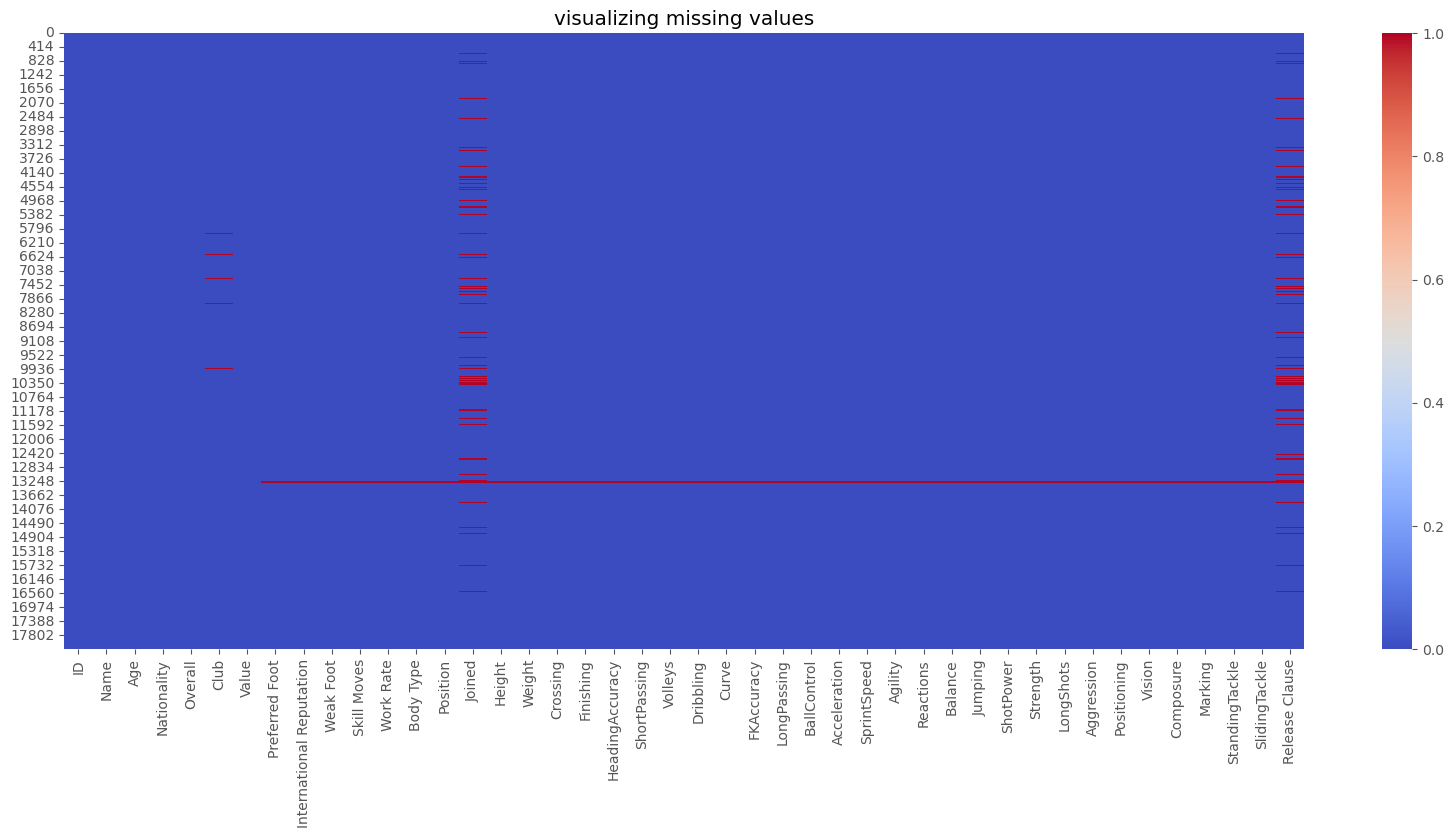

In [10]:
# visualize the missing values
plt.figure(figsize = (20, 8))
plt.title('visualizing missing values')
sns.heatmap(df.isnull(), cbar = True, cmap = 'coolwarm')
plt.show()

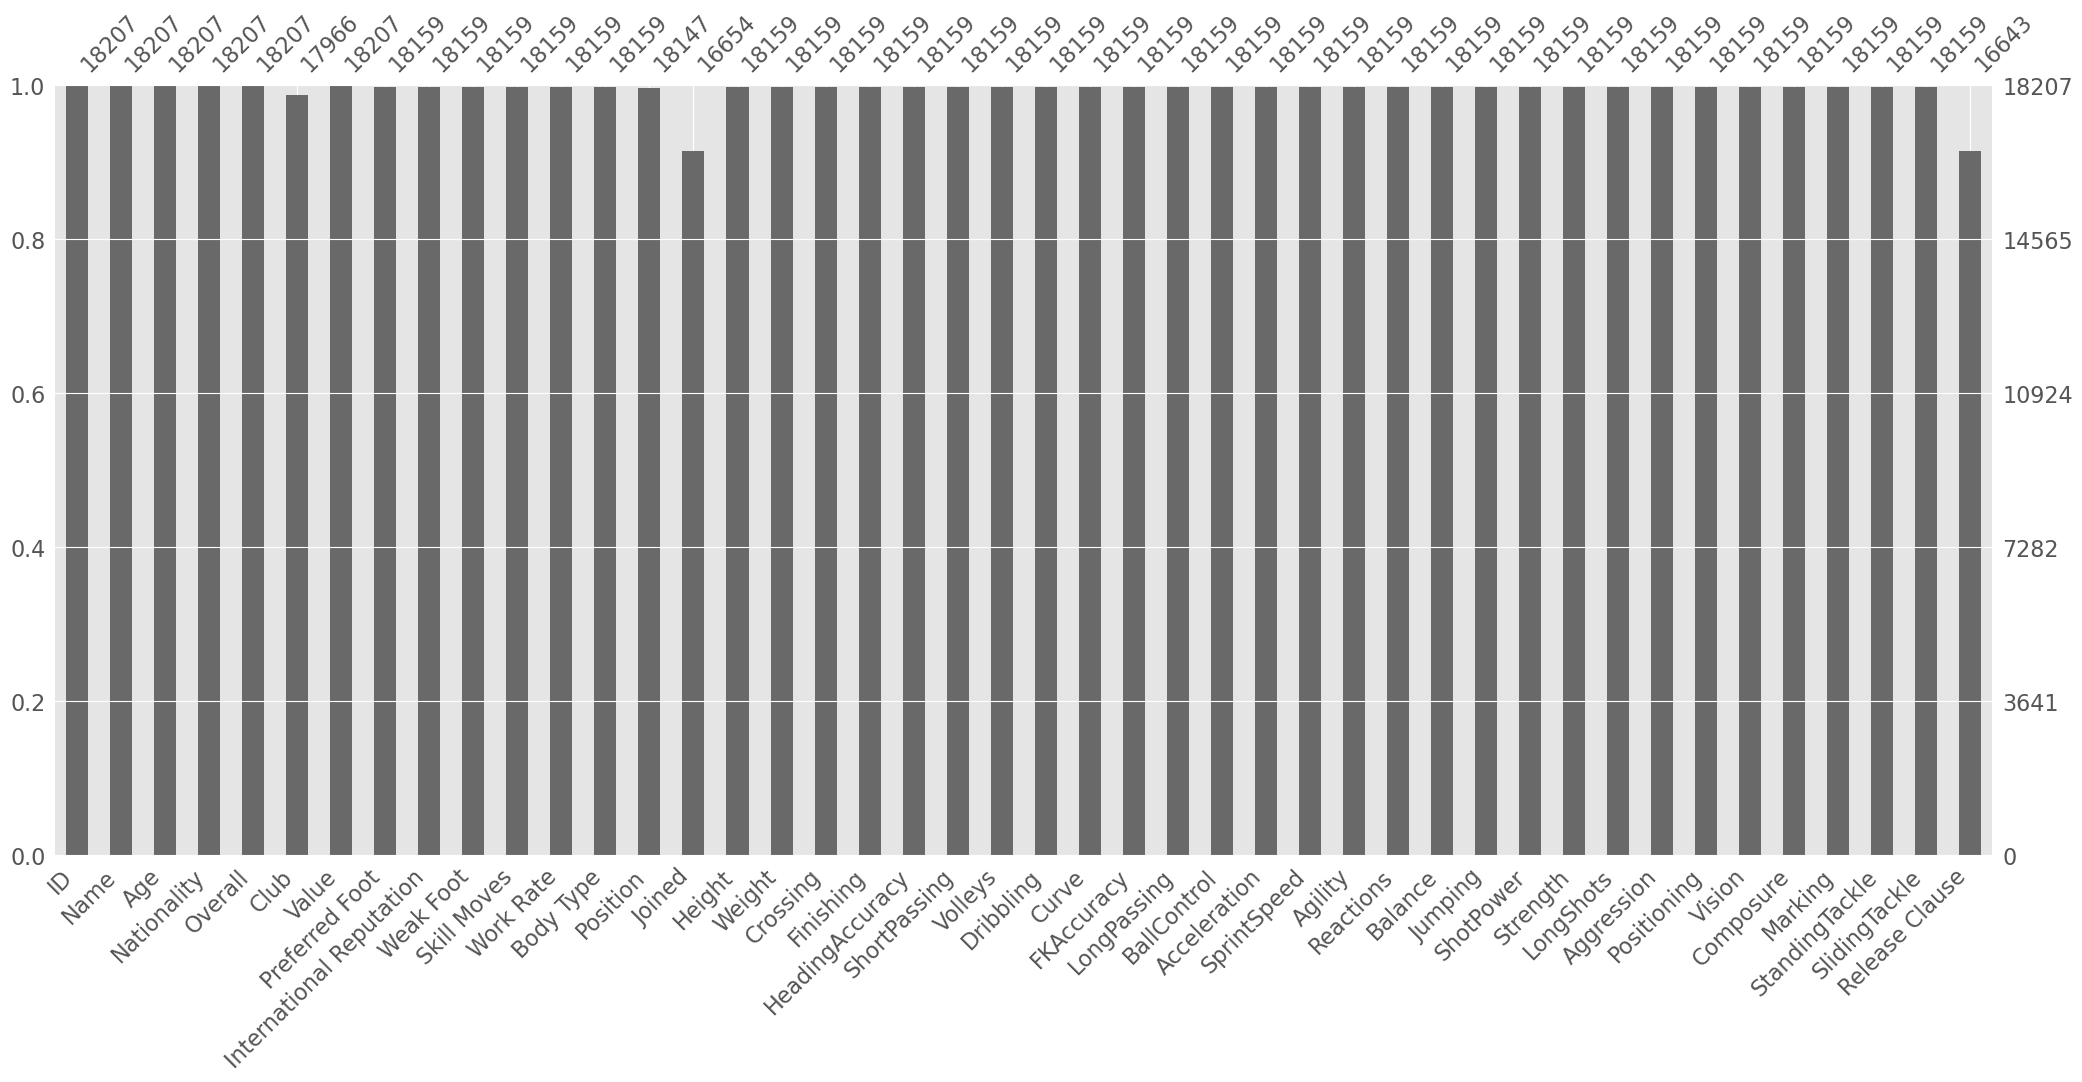

In [11]:
# pattern of missingness
import missingno as msno
msno.bar(df)
plt.show()

In [12]:
# summary statistics of the data
df.describe().astype('int')

ID    Age  Overall  International Reputation  Weak Foot  \
count   18207  18207    18207                     18159      18159   
mean   214298     25       66                         1          2   
std     29965      4        6                         0          0   
min        16     16       46                         1          1   
25%    200315     21       62                         1          3   
50%    221759     25       66                         1          3   
75%    236529     28       71                         1          3   
max    246620     45       94                         5          5   

       Skill Moves  Crossing  Finishing  HeadingAccuracy  ShortPassing  ...  \
count        18159     18159      18159            18159         18159  ...   
mean             2        49         45               52            58  ...   
std              0        18         19               17            14  ...   
min              1         5          2                4             7  ...   
25%              2        38         30               44            54  ...   
50%              2        54         49               56            62  ...   
75%              3        64         62               64            68  ...   
max              5        93         95               94            93  ...   

       ShotPower  Strength  LongShots  Aggression  Positioning  Vision  \
count      18159     18159      18159       18159        18159   18159   
mean          55        65         47          55           49      53   
std           17        12         19          17           19      14   
min            2        17          3          11            2      10   
25%           45        58         33          44           38      44   
50%           59        67         51          59           55      55   
75%           68        74         62          69           64      64   
max           95        97         94          95           95      94   

       Composure  Marking  StandingTackle  SlidingTackle  
count      18159    18159           18159          18159  
mean          58       47              47             45  
std           11       19              21             21  
min            3        3               2              3  
25%           51       30              27             24  
50%           60       53              55             52  
75%           67       64              66             64  
max           96       94              93             91  

[8 rows x 32 columns]

In the bustling world of professional football, where talent is measured in numbers and potential is gauged by statistics, there stood a young prodigy named Alex. At just 16 years old, Alex's raw abilities were on full display, with a staggering overall rating of 94 and an impressive international reputation of 5 – a rare feat for someone so young.

As Alex's career began to take shape, scouts from the top clubs in the world scrambled to secure his signature, captivated by his remarkable skill set. With a strong weak foot, impressive skill moves, and exceptional crossing and finishing abilities, Alex quickly became the talk of the football community.

Despite his tender age, Alex's composure and vision on the pitch were unparalleled, allowing him to orchestrate the game with an effortless elegance. His shot power and long shots struck fear into the hearts of opponents, while his defensive prowess, marked by his solid tackling and marking skills, made him a valuable asset on both ends of the field.

As Alex's career progressed, he continued to shatter records and earn the admiration of fans and fellow players alike. His dedication to the game, combined with his natural talent, propelled him to the highest echelons of the sport, solidifying his status as one of the greatest footballers of his generation.

In the end, Alex's story was not just about the numbers on the page, but the passion, determination, and unwavering spirit that drove him to reach the pinnacle of his craft, leaving an indelible mark on the game he loved.

In [13]:
# extract the numerical columns from the dataset
num_vars = df.select_dtypes(include=['int64', 'float64'])

# confirm if there are negative for each columns
num_vars_negative = (num_vars < 0).sum()

print(num_vars_negative)

ID                          0
Age                         0
Overall                     0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
Jumping                     0
ShotPower                   0
Strength                    0
LongShots                   0
Aggression                  0
Positioning                 0
Vision                      0
Composure                   0
Marking                     0
StandingTackle              0
SlidingTackle               0
dtype: int64


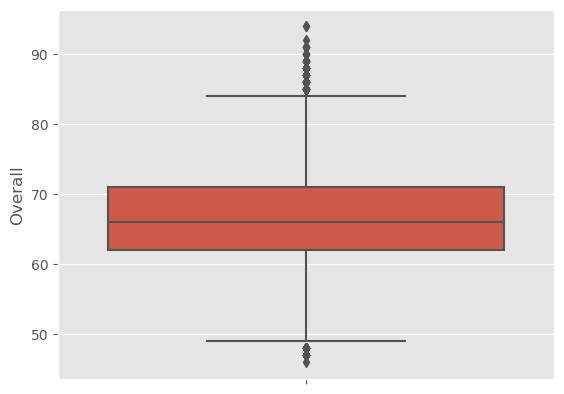

In [14]:
# plotting a box plot for a separate column
sns.boxplot(y=df['Overall'], data=df)
plt.show()

ID                           450
Age                           47
Overall                      163
International Reputation    1627
Weak Foot                   6810
Skill Moves                   51
Crossing                       0
Finishing                      0
HeadingAccuracy              998
ShortPassing                1729
Volleys                        0
Dribbling                   1924
Curve                          0
FKAccuracy                     0
LongPassing                   17
BallControl                 2044
Acceleration                 480
SprintSpeed                  444
Agility                      192
Reactions                    133
Balance                      243
Jumping                      386
ShotPower                     15
Strength                     259
LongShots                      0
Aggression                     0
Positioning                    0
Vision                        63
Composure                    155
Marking                        0
StandingTa

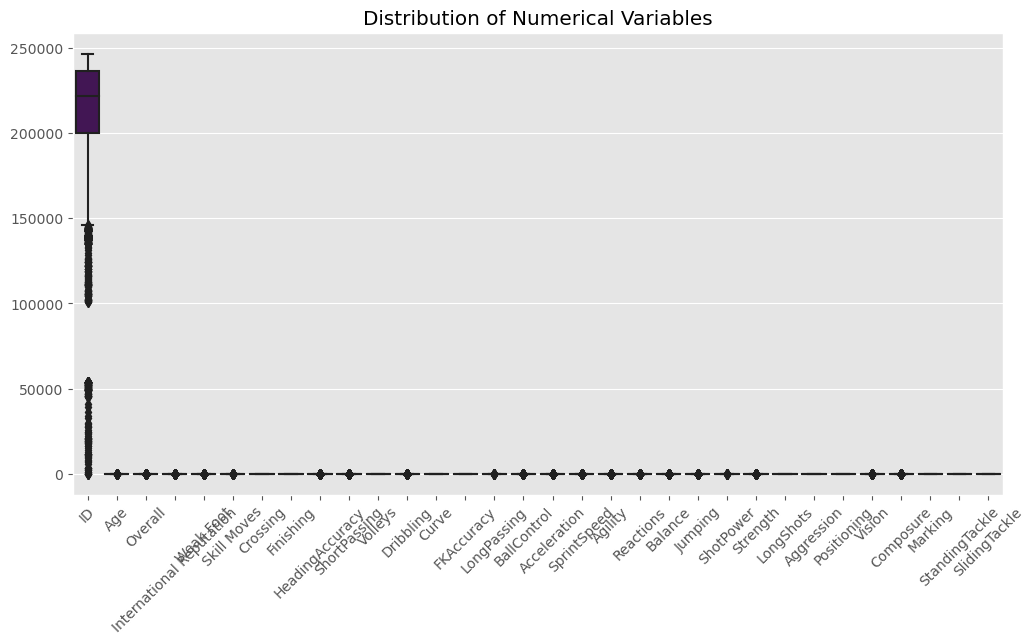

In [15]:
num_vars = df.select_dtypes(include=['int64', 'float64'])

# Calculate the number of outliers for each numerical variable
outliers_count = ((num_vars < num_vars.quantile(0.25) - 1.5 * (num_vars.quantile(0.75) - num_vars.quantile(0.25))) |
                  (num_vars > num_vars.quantile(0.75) + 1.5 * (num_vars.quantile(0.75) - num_vars.quantile(0.25))))
outliers_count = outliers_count.sum()

# Display the number of outliers in a table
print(outliers_count)

# Create a boxplot to show the distribution of each numerical variable
plt.figure(figsize=(12, 6))
sns.boxplot(data=num_vars, palette='viridis')
plt.title('Distribution of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Calculate the median of each numerical variable
medians = num_vars.median()

# Replace outliers with the median of each variable
for column in num_vars.columns:
    q1 = num_vars[column].quantile(0.25)
    q3 = num_vars[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    num_vars[column] = num_vars[column].apply(lambda x: medians[column] if x < lower_bound or x > upper_bound else x)


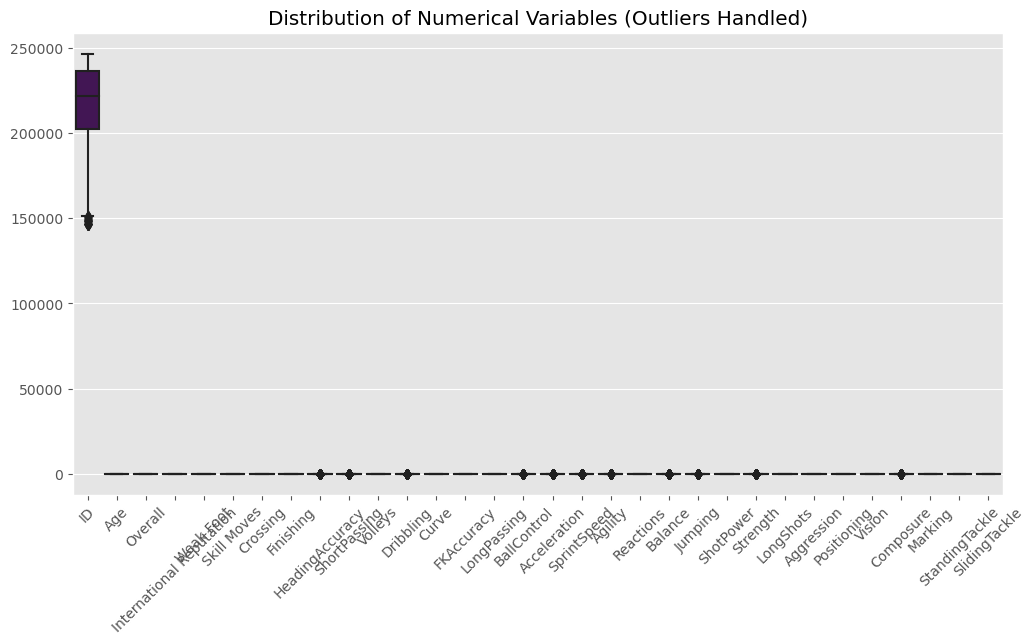

In [17]:
# Create a boxplot to show the distribution of each numerical variable after handling outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=num_vars, palette='viridis')
plt.title('Distribution of Numerical Variables (Outliers Handled)')
plt.xticks(rotation=45)
plt.show()

In [18]:
num_vars.describe()

ID           Age       Overall  International Reputation  \
count   18207.000000  18207.000000  18207.000000                   18159.0   
mean   217278.625419     25.083759     66.164937                       1.0   
std     22778.869546      4.608543      6.638033                       0.0   
min    145996.000000     16.000000     49.000000                       1.0   
25%    202444.500000     21.000000     62.000000                       1.0   
50%    221759.000000     25.000000     66.000000                       1.0   
75%    236529.500000     28.000000     71.000000                       1.0   
max    246620.000000     38.000000     84.000000                       1.0   

       Weak Foot   Skill Moves      Crossing     Finishing  HeadingAccuracy  \
count    18159.0  18159.000000  18159.000000  18159.000000     18159.000000   
mean         3.0      2.352883     49.734181     45.550911        54.743268   
std          0.0      0.743319     18.364524     19.525820        14.327828   
min          3.0      1.000000      5.000000      2.000000        14.000000   
25%          3.0      2.000000     38.000000     30.000000        48.000000   
50%          3.0      2.000000     54.000000     49.000000        56.000000   
75%          3.0      3.000000     64.000000     62.000000        64.000000   
max          3.0      4.000000     93.000000     95.000000        94.000000   

       ShortPassing  ...     ShotPower      Strength     LongShots  \
count  18159.000000  ...  18159.000000  18159.000000  18159.000000   
mean      62.204747  ...     55.502396     65.824219     47.109973   
std        9.578439  ...     17.183398     11.861151     19.260524   
min       33.000000  ...     11.000000     34.000000      3.000000   
25%       58.000000  ...     45.000000     59.000000     33.000000   
50%       62.000000  ...     59.000000     67.000000     51.000000   
75%       68.000000  ...     68.000000     74.000000     62.000000   
max       89.000000  ...     95.000000     97.000000     94.000000   

         Aggression   Positioning        Vision     Composure       Marking  \
count  18159.000000  18159.000000  18159.000000  18159.000000  18159.000000   
mean      55.868991     49.958478     53.550911     58.943719     47.281623   
std       17.367967     19.529036     13.932047     10.934244     19.904397   
min       11.000000      2.000000     14.000000     27.000000      3.000000   
25%       44.000000     38.000000     44.000000     52.000000     30.000000   
50%       59.000000     55.000000     55.000000     60.000000     53.000000   
75%       69.000000     64.000000     64.000000     67.000000     64.000000   
max       95.000000     95.000000     94.000000     91.000000     94.000000   

       StandingTackle  SlidingTackle  
count    18159.000000   18159.000000  
mean        47.697836      45.661435  
std         21.664004      21.289135  
min          2.000000       3.000000  
25%         27.000000      24.000000  
50%         55.000000      52.000000  
75%         66.000000      64.000000  
max         93.000000      91.000000  

[8 rows x 32 columns]

In [19]:
df.describe()

ID           Age       Overall  International Reputation  \
count   18207.000000  18207.000000  18207.000000              18159.000000   
mean   214298.338606     25.122206     66.238699                  1.113222   
std     29965.244204      4.669943      6.908930                  0.394031   
min        16.000000     16.000000     46.000000                  1.000000   
25%    200315.500000     21.000000     62.000000                  1.000000   
50%    221759.000000     25.000000     66.000000                  1.000000   
75%    236529.500000     28.000000     71.000000                  1.000000   
max    246620.000000     45.000000     94.000000                  5.000000   

          Weak Foot   Skill Moves      Crossing     Finishing  \
count  18159.000000  18159.000000  18159.000000  18159.000000   
mean       2.947299      2.361308     49.734181     45.550911   
std        0.660456      0.756164     18.364524     19.525820   
min        1.000000      1.000000      5.000000      2.000000   
25%        3.000000      2.000000     38.000000     30.000000   
50%        3.000000      2.000000     54.000000     49.000000   
75%        3.000000      3.000000     64.000000     62.000000   
max        5.000000      5.000000     93.000000     95.000000   

       HeadingAccuracy  ShortPassing  ...     ShotPower      Strength  \
count     18159.000000  18159.000000  ...  18159.000000  18159.000000   
mean         52.298144     58.686712  ...     55.460047     65.311967   
std          17.379909     14.699495  ...     17.237958     12.557000   
min           4.000000      7.000000  ...      2.000000     17.000000   
25%          44.000000     54.000000  ...     45.000000     58.000000   
50%          56.000000     62.000000  ...     59.000000     67.000000   
75%          64.000000     68.000000  ...     68.000000     74.000000   
max          94.000000     93.000000  ...     95.000000     97.000000   

          LongShots    Aggression   Positioning        Vision     Composure  \
count  18159.000000  18159.000000  18159.000000  18159.000000  18159.000000   
mean      47.109973     55.868991     49.958478     53.400903     58.648274   
std       19.260524     17.367967     19.529036     14.146881     11.436133   
min        3.000000     11.000000      2.000000     10.000000      3.000000   
25%       33.000000     44.000000     38.000000     44.000000     51.000000   
50%       51.000000     59.000000     55.000000     55.000000     60.000000   
75%       62.000000     69.000000     64.000000     64.000000     67.000000   
max       94.000000     95.000000     95.000000     94.000000     96.000000   

            Marking  StandingTackle  SlidingTackle  
count  18159.000000    18159.000000   18159.000000  
mean      47.281623       47.697836      45.661435  
std       19.904397       21.664004      21.289135  
min        3.000000        2.000000       3.000000  
25%       30.000000       27.000000      24.000000  
50%       53.000000       55.000000      52.000000  
75%       64.000000       66.000000      64.000000  
max       94.000000       93.000000      91.000000  

[8 rows x 32 columns]

In [20]:
# extract the categorical columns
cat_vars = df.select_dtypes(include = ['object', 'category'])
cat_vars

Name Nationality                 Club    Value  \
0                L. Messi   Argentina         FC Barcelona  €110.5M   
1       Cristiano Ronaldo    Portugal             Juventus     €77M   
2               Neymar Jr      Brazil  Paris Saint-Germain  €118.5M   
3                  De Gea       Spain    Manchester United     €72M   
4            K. De Bruyne     Belgium      Manchester City    €102M   
...                   ...         ...                  ...      ...   
18202        J. Lundstram     England      Crewe Alexandra     €60K   
18203  N. Christoffersson      Sweden       Trelleborgs FF     €60K   
18204           B. Worman     England     Cambridge United     €60K   
18205      D. Walker-Rice     England      Tranmere Rovers     €60K   
18206           G. Nugent     England      Tranmere Rovers     €60K   

      Preferred Foot       Work Rate   Body Type Position        Joined  \
0               Left  Medium/ Medium       Messi       RF   Jul 1, 2004   
1              Right       High/ Low  C. Ronaldo       ST  Jul 10, 2018   
2              Right    High/ Medium      Neymar       LW   Aug 3, 2017   
3              Right  Medium/ Medium        Lean       GK   Jul 1, 2011   
4              Right      High/ High      Normal      RCM  Aug 30, 2015   
...              ...             ...         ...      ...           ...   
18202          Right  Medium/ Medium        Lean       CM   May 3, 2017   
18203          Right  Medium/ Medium      Normal       ST  Mar 19, 2018   
18204          Right  Medium/ Medium      Normal       ST   Jul 1, 2017   
18205          Right  Medium/ Medium        Lean       RW  Apr 24, 2018   
18206          Right  Medium/ Medium        Lean       CM  Oct 30, 2018   

      Height  Weight Release Clause  
0        5'7  159lbs        €226.5M  
1        6'2  183lbs        €127.1M  
2        5'9  150lbs        €228.1M  
3        6'4  168lbs        €138.6M  
4       5'11  154lbs        €196.4M  
...      ...     ...            ...  
18202    5'9  134lbs          €143K  
18203    6'3  170lbs          €113K  
18204    5'8  148lbs          €165K  
18205   5'10  154lbs          €143K  
18206   5'10  176lbs          €165K  

[18207 rows x 12 columns]

In [21]:
df1 = pd.concat([cat_vars, num_vars], axis = 1)
df1.head()

Name Nationality                 Club    Value Preferred Foot  \
0           L. Messi   Argentina         FC Barcelona  €110.5M           Left   
1  Cristiano Ronaldo    Portugal             Juventus     €77M          Right   
2          Neymar Jr      Brazil  Paris Saint-Germain  €118.5M          Right   
3             De Gea       Spain    Manchester United     €72M          Right   
4       K. De Bruyne     Belgium      Manchester City    €102M          Right   

        Work Rate   Body Type Position        Joined Height  ... ShotPower  \
0  Medium/ Medium       Messi       RF   Jul 1, 2004    5'7  ...      85.0   
1       High/ Low  C. Ronaldo       ST  Jul 10, 2018    6'2  ...      95.0   
2    High/ Medium      Neymar       LW   Aug 3, 2017    5'9  ...      80.0   
3  Medium/ Medium        Lean       GK   Jul 1, 2011    6'4  ...      31.0   
4      High/ High      Normal      RCM  Aug 30, 2015   5'11  ...      91.0   

  Strength  LongShots  Aggression  Positioning  Vision  Composure  Marking  \
0     59.0       94.0        48.0         94.0    94.0       60.0     33.0   
1     79.0       93.0        63.0         95.0    82.0       60.0     28.0   
2     49.0       82.0        56.0         89.0    87.0       60.0     27.0   
3     64.0       12.0        38.0         12.0    68.0       68.0     15.0   
4     75.0       91.0        76.0         87.0    94.0       88.0     68.0   

   StandingTackle  SlidingTackle  
0            28.0           26.0  
1            31.0           23.0  
2            24.0           33.0  
3            21.0           13.0  
4            58.0           51.0  

[5 rows x 44 columns]

In [22]:
df1.shape

(18207, 44)

## Data Validation

In [23]:
# select the numerical variables
print(num_vars)

# value counts for numerical variables
for column in num_vars:
    print(df[column].value_counts())

             ID   Age  Overall  International Reputation  Weak Foot  \
0      158023.0  31.0     66.0                       1.0        3.0   
1      221759.0  33.0     66.0                       1.0        3.0   
2      190871.0  26.0     66.0                       1.0        3.0   
3      193080.0  27.0     66.0                       1.0        3.0   
4      192985.0  27.0     66.0                       1.0        3.0   
...         ...   ...      ...                       ...        ...   
18202  238813.0  19.0     66.0                       1.0        3.0   
18203  243165.0  19.0     66.0                       1.0        3.0   
18204  241638.0  16.0     66.0                       1.0        3.0   
18205  246268.0  17.0     66.0                       1.0        3.0   
18206  246269.0  16.0     66.0                       1.0        3.0   

       Skill Moves  Crossing  Finishing  HeadingAccuracy  ShortPassing  ...  \
0              4.0      84.0       95.0             70.0          62

In [24]:
# select the categorical variables
cat_vars = df.select_dtypes(include=['category', 'object'])
print(cat_vars)

# value counts for categorical variables
for column in cat_vars:
    print(df[column].value_counts())

                     Name Nationality                 Club    Value  \
0                L. Messi   Argentina         FC Barcelona  €110.5M   
1       Cristiano Ronaldo    Portugal             Juventus     €77M   
2               Neymar Jr      Brazil  Paris Saint-Germain  €118.5M   
3                  De Gea       Spain    Manchester United     €72M   
4            K. De Bruyne     Belgium      Manchester City    €102M   
...                   ...         ...                  ...      ...   
18202        J. Lundstram     England      Crewe Alexandra     €60K   
18203  N. Christoffersson      Sweden       Trelleborgs FF     €60K   
18204           B. Worman     England     Cambridge United     €60K   
18205      D. Walker-Rice     England      Tranmere Rovers     €60K   
18206           G. Nugent     England      Tranmere Rovers     €60K   

      Preferred Foot       Work Rate   Body Type Position        Joined  \
0               Left  Medium/ Medium       Messi       RF   Jul 1, 2004 

In [25]:
# check for missing values
df1.isnull().sum()

Name                           0
Nationality                    0
Club                         241
Value                          0
Preferred Foot                48
Work Rate                     48
Body Type                     48
Position                      60
Joined                      1553
Height                        48
Weight                        48
Release Clause              1564
ID                             0
Age                            0
Overall                        0
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Crossing                      48
Finishing                     48
HeadingAccuracy               48
ShortPassing                  48
Volleys                       48
Dribbling                     48
Curve                         48
FKAccuracy                    48
LongPassing                   48
BallControl                   48
Acceleration                  48
SprintSpeed                   48
Agility   

In [26]:
# Replace missing values in numerical columns with mean
numerical_columns = df1.select_dtypes(include=['int', 'float']).columns
df1[numerical_columns] = df1[numerical_columns].fillna(df1[numerical_columns].mean())

# Replace missing categorical values with most frequent category
categorical_columns = df1.select_dtypes(include=['object']).columns
df1[categorical_columns] = df1[categorical_columns].fillna(df1[categorical_columns].mode().iloc[0])

In [27]:
# check for missing values
df1.isnull().sum()

Name                        0
Nationality                 0
Club                        0
Value                       0
Preferred Foot              0
Work Rate                   0
Body Type                   0
Position                    0
Joined                      0
Height                      0
Weight                      0
Release Clause              0
ID                          0
Age                         0
Overall                     0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
Jumping   

## Exploratory Data Analysis
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

### Univariate Analysis¶

We will be analyzing the distribution of individual features and visualizing them.

In [28]:
df1.head()

Name Nationality                 Club    Value Preferred Foot  \
0           L. Messi   Argentina         FC Barcelona  €110.5M           Left   
1  Cristiano Ronaldo    Portugal             Juventus     €77M          Right   
2          Neymar Jr      Brazil  Paris Saint-Germain  €118.5M          Right   
3             De Gea       Spain    Manchester United     €72M          Right   
4       K. De Bruyne     Belgium      Manchester City    €102M          Right   

        Work Rate   Body Type Position        Joined Height  ... ShotPower  \
0  Medium/ Medium       Messi       RF   Jul 1, 2004    5'7  ...      85.0   
1       High/ Low  C. Ronaldo       ST  Jul 10, 2018    6'2  ...      95.0   
2    High/ Medium      Neymar       LW   Aug 3, 2017    5'9  ...      80.0   
3  Medium/ Medium        Lean       GK   Jul 1, 2011    6'4  ...      31.0   
4      High/ High      Normal      RCM  Aug 30, 2015   5'11  ...      91.0   

  Strength  LongShots  Aggression  Positioning  Vision  Composure  Marking  \
0     59.0       94.0        48.0         94.0    94.0       60.0     33.0   
1     79.0       93.0        63.0         95.0    82.0       60.0     28.0   
2     49.0       82.0        56.0         89.0    87.0       60.0     27.0   
3     64.0       12.0        38.0         12.0    68.0       68.0     15.0   
4     75.0       91.0        76.0         87.0    94.0       88.0     68.0   

   StandingTackle  SlidingTackle  
0            28.0           26.0  
1            31.0           23.0  
2            24.0           33.0  
3            21.0           13.0  
4            58.0           51.0  

[5 rows x 44 columns]

In [29]:
cat_vars.columns.tolist()

['Name',
 'Nationality',
 'Club',
 'Value',
 'Preferred Foot',
 'Work Rate',
 'Body Type',
 'Position',
 'Joined',
 'Height',
 'Weight',
 'Release Clause']

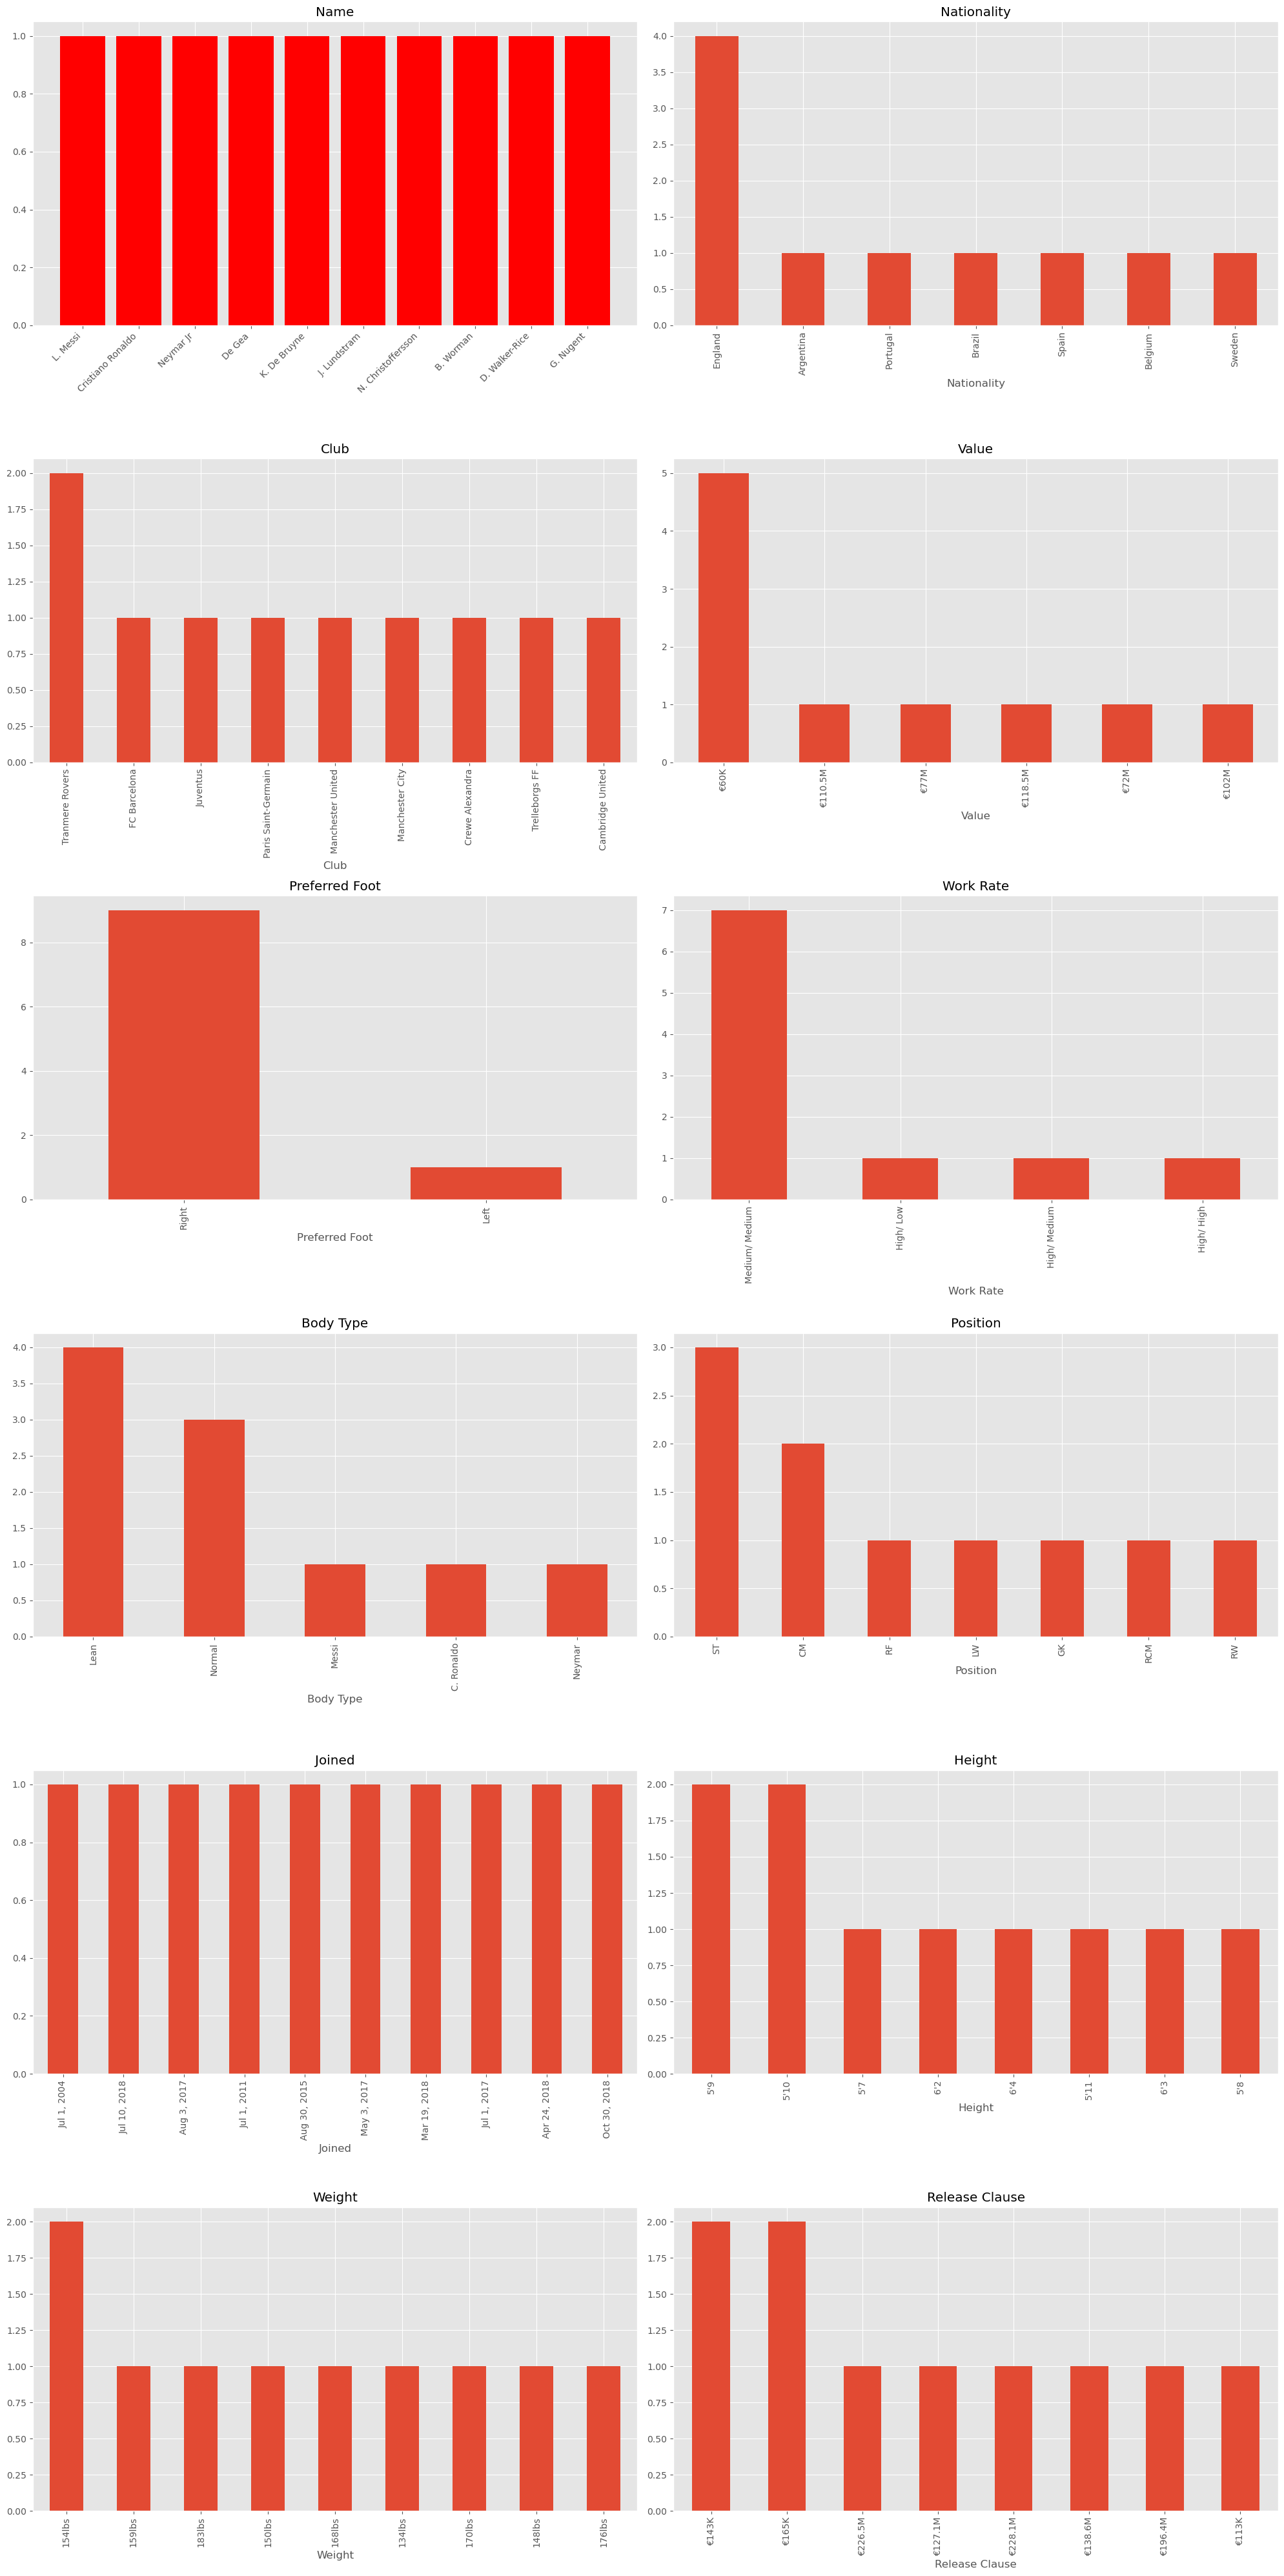

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame from the provided data
data = {
    'Name': ['L. Messi', 'Cristiano Ronaldo', 'Neymar Jr', 'De Gea', 'K. De Bruyne', 'J. Lundstram', 'N. Christoffersson', 'B. Worman', 'D. Walker-Rice', 'G. Nugent'],
    'Nationality': ['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'England', 'Sweden', 'England', 'England', 'England'],
    'Club': ['FC Barcelona', 'Juventus', 'Paris Saint-Germain', 'Manchester United', 'Manchester City', 'Crewe Alexandra', 'Trelleborgs FF', 'Cambridge United', 'Tranmere Rovers', 'Tranmere Rovers'],
    'Value': ['€110.5M', '€77M', '€118.5M', '€72M', '€102M', '€60K', '€60K', '€60K', '€60K', '€60K'],
    'Preferred Foot': ['Left', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right', 'Right'],
    'Work Rate': ['Medium/ Medium', 'High/ Low', 'High/ Medium', 'Medium/ Medium', 'High/ High', 'Medium/ Medium', 'Medium/ Medium', 'Medium/ Medium', 'Medium/ Medium', 'Medium/ Medium'],
    'Body Type': ['Messi', 'C. Ronaldo', 'Neymar', 'Lean', 'Normal', 'Lean', 'Normal', 'Normal', 'Lean', 'Lean'],
    'Position': ['RF', 'ST', 'LW', 'GK', 'RCM', 'CM', 'ST', 'ST', 'RW', 'CM'],
    'Joined': ['Jul 1, 2004', 'Jul 10, 2018', 'Aug 3, 2017', 'Jul 1, 2011', 'Aug 30, 2015', 'May 3, 2017', 'Mar 19, 2018', 'Jul 1, 2017', 'Apr 24, 2018', 'Oct 30, 2018'],
    'Height': ["5'7", "6'2", "5'9", "6'4", "5'11", "5'9", "6'3", "5'8", "5'10", "5'10"],
    'Weight': ['159lbs', '183lbs', '150lbs', '168lbs', '154lbs', '134lbs', '170lbs', '148lbs', '154lbs', '176lbs'],
    'Release Clause': ['€226.5M', '€127.1M', '€228.1M', '€138.6M', '€196.4M', '€143K', '€113K', '€165K', '€143K', '€165K']
}

df = pd.DataFrame(data)

# Create the subplot
fig, axs = plt.subplots(6, 2, figsize=(20, 40))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Plot unique values of the 'Name' attribute
unique_names = df['Name'].unique()
ax = axs[0]
ax.bar(range(len(unique_names)), [1] * len(unique_names), color='red')
ax.set_xticks(range(len(unique_names)))
ax.set_xticklabels(unique_names, rotation=45, ha='right')
ax.set_title('Name')

# Iterate over each attribute (excluding 'Name') and plot the top 10
for i, column in enumerate(df.columns[1:]):
    top_10 = df[column].value_counts().head(10)
    ax = axs[i+1]
    top_10.plot(kind='bar', ax=ax)
    ax.set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()


In [31]:
num_vars.columns.tolist()

['ID',
 'Age',
 'Overall',
 'International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'Jumping',
 'ShotPower',
 'Strength',
 'LongShots',
 'Aggression',
 'Positioning',
 'Vision',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle']

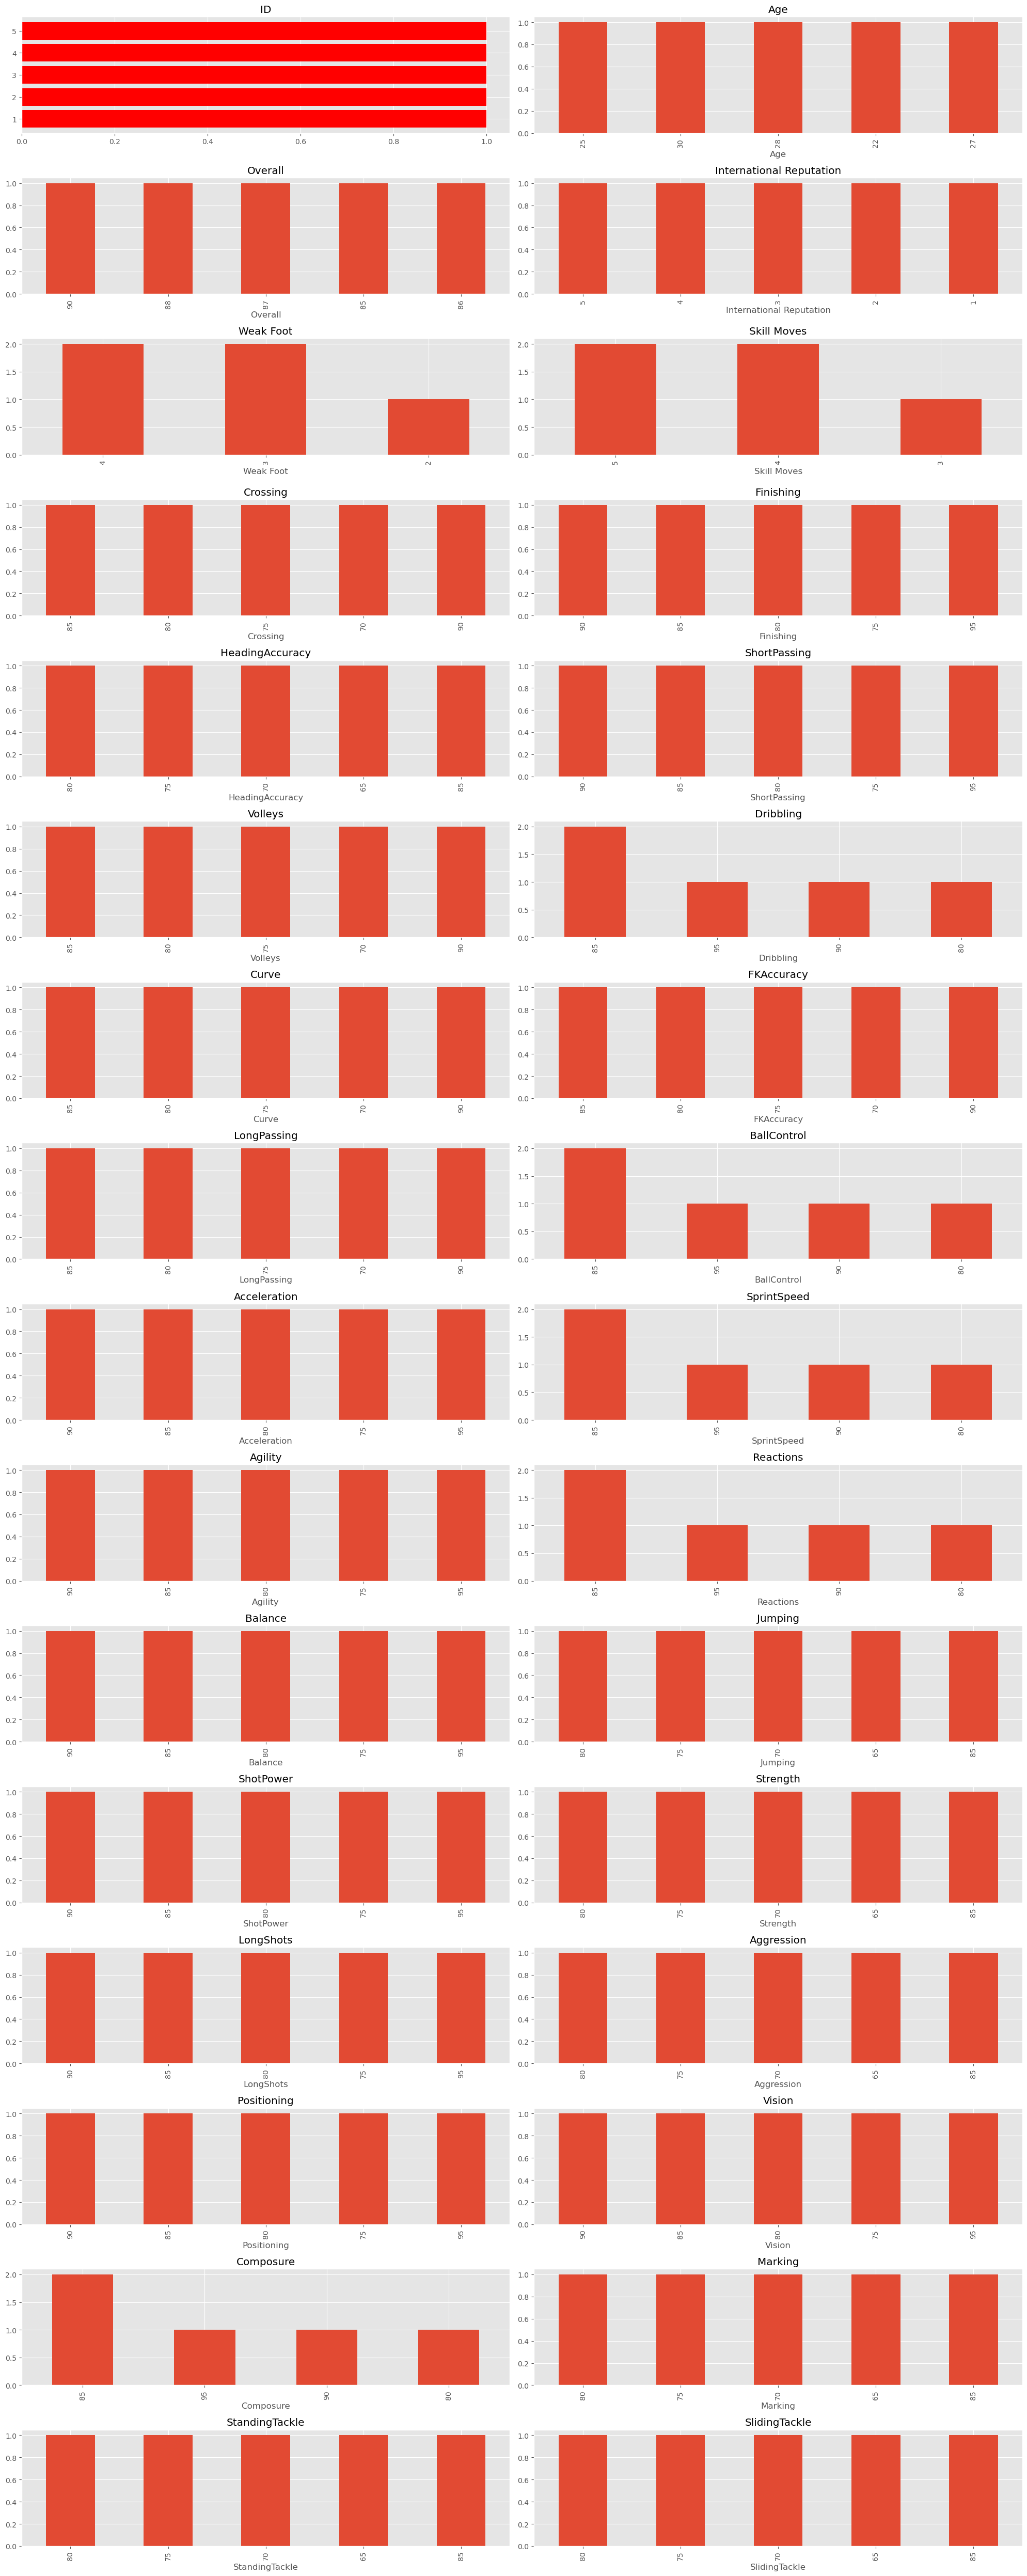

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Your provided data
data = {
    'ID': [1, 2, 3, 4, 5],
    'Age': [25, 30, 28, 22, 27],
    'Overall': [90, 88, 87, 85, 86],
    'International Reputation': [5, 4, 3, 2, 1],
    'Weak Foot': [4, 3, 3, 2, 4],
    'Skill Moves': [5, 4, 4, 3, 5],
    'Crossing': [85, 80, 75, 70, 90],
    'Finishing': [90, 85, 80, 75, 95],
    'HeadingAccuracy': [80, 75, 70, 65, 85],
    'ShortPassing': [90, 85, 80, 75, 95],
    'Volleys': [85, 80, 75, 70, 90],
    'Dribbling': [95, 90, 85, 80, 85],
    'Curve': [85, 80, 75, 70, 90],
    'FKAccuracy': [85, 80, 75, 70, 90],
    'LongPassing': [85, 80, 75, 70, 90],
    'BallControl': [95, 90, 85, 80, 85],
    'Acceleration': [90, 85, 80, 75, 95],
    'SprintSpeed': [95, 90, 85, 80, 85],
    'Agility': [90, 85, 80, 75, 95],
    'Reactions': [95, 90, 85, 80, 85],
    'Balance': [90, 85, 80, 75, 95],
    'Jumping': [80, 75, 70, 65, 85],
    'ShotPower': [90, 85, 80, 75, 95],
    'Strength': [80, 75, 70, 65, 85],
    'LongShots': [90, 85, 80, 75, 95],
    'Aggression': [80, 75, 70, 65, 85],
    'Positioning': [90, 85, 80, 75, 95],
    'Vision': [90, 85, 80, 75, 95],
    'Composure': [95, 90, 85, 80, 85],
    'Marking': [80, 75, 70, 65, 85],
    'StandingTackle': [80, 75, 70, 65, 85],
    'SlidingTackle': [80, 75, 70, 65, 85]
}

df = pd.DataFrame(data)

# Create the subplot
fig, axs = plt.subplots(16, 2, figsize=(20, 50))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Plot unique values of the 'ID' attribute
unique_ids = df['ID'].unique()
ax = axs[0]
ax.barh(range(len(unique_ids)), [1] * len(unique_ids), color='red')
ax.set_yticks(range(len(unique_ids)))
ax.set_yticklabels(unique_ids)
ax.set_title('ID')

# Iterate over each attribute and plot the top 10 unique values
for i, column in enumerate(df.columns[1:]):
    top_10 = df[column].value_counts().head(10)
    ax = axs[i+1]
    top_10.plot(kind='bar', ax=ax)
    ax.set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()


### Bivariate Analysis¶

We will be analyzing the relationship between two variables and visualizing them. This can help us understand how variables are related to each other and identify potential patterns or trends in the data. For example, we might analyze the relationship between Loan_Id and LoanAmount, or Gender and Credit History.

In [33]:
df1.columns.tolist()

['Name',
 'Nationality',
 'Club',
 'Value',
 'Preferred Foot',
 'Work Rate',
 'Body Type',
 'Position',
 'Joined',
 'Height',
 'Weight',
 'Release Clause',
 'ID',
 'Age',
 'Overall',
 'International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'Jumping',
 'ShotPower',
 'Strength',
 'LongShots',
 'Aggression',
 'Positioning',
 'Vision',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle']

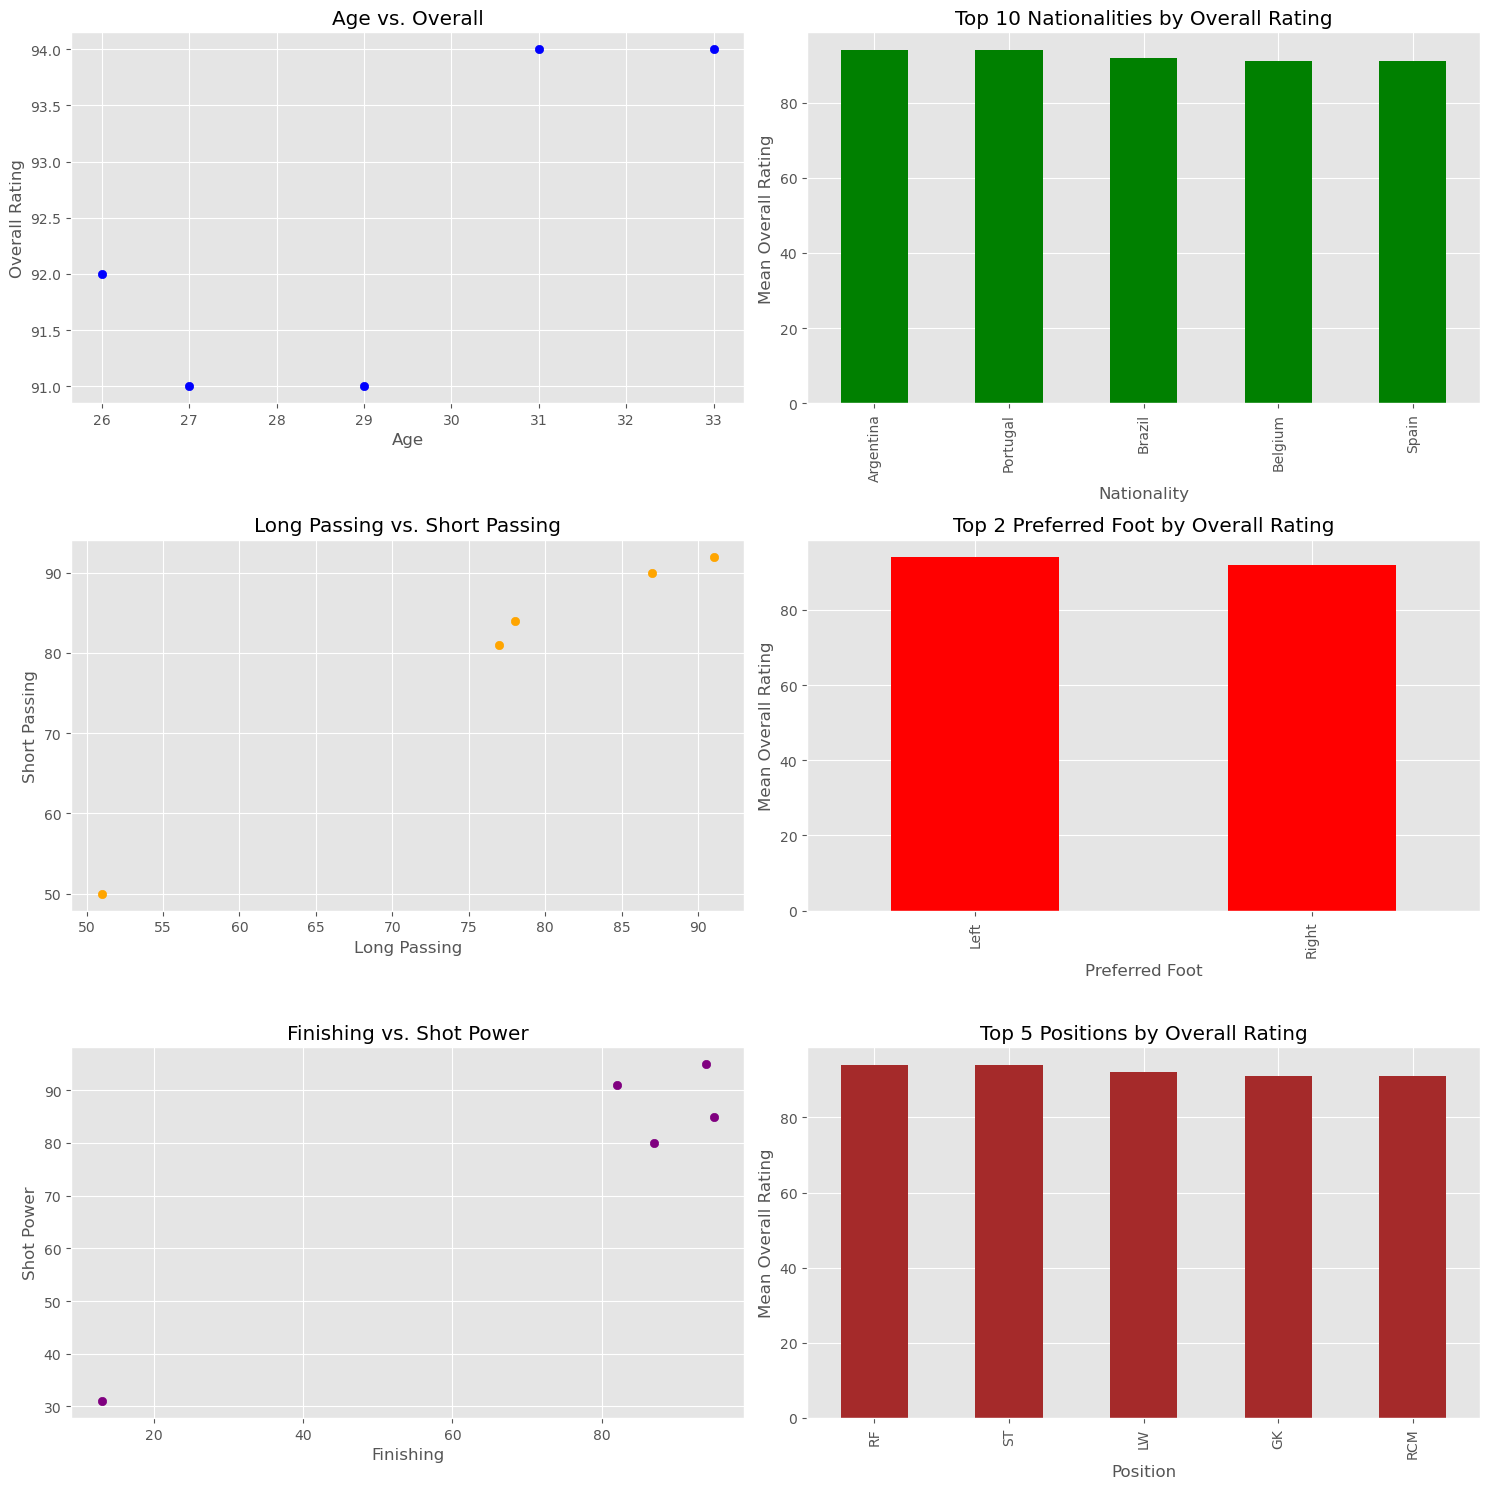

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Your provided data
data = {
    'Name': ['L. Messi', 'Cristiano Ronaldo', 'Neymar Jr', 'De Gea', 'K. De Bruyne'],
    'Nationality': ['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium'],
    'Club': ['FC Barcelona', 'Juventus', 'Paris Saint-Germain', 'Manchester United', 'Manchester City'],
    'Value': ['€110.5M', '€77M', '€118.5M', '€72M', '€102M'],
    'Preferred Foot': ['Left', 'Right', 'Right', 'Right', 'Right'],
    'Work Rate': ['Medium/ Medium', 'High/ Low', 'High/ Medium', 'Medium/ Medium', 'High/ High'],
    'Body Type': ['Messi', 'C. Ronaldo', 'Neymar', 'Lean', 'Normal'],
    'Position': ['RF', 'ST', 'LW', 'GK', 'RCM'],
    'Joined': ['Jul 1, 2004', 'Jul 10, 2018', 'Aug 3, 2017', 'Jul 1, 2011', 'Aug 30, 2015'],
    'Height': ["5'7", "6'2", "5'9", "6'4", "5'11"],
    'Weight': ['159lbs', '183lbs', '150lbs', '168lbs', '154lbs'],
    'Release Clause': ['€226.5M', '€127.1M', '€228.1M', '€138.6M', '€196.4M'],
    'ID': [1, 2, 3, 4, 5],
    'Age': [31, 33, 26, 27, 29],
    'Overall': [94, 94, 92, 91, 91],
    'International Reputation': [5, 5, 5, 4, 4],
    'Weak Foot': [4, 4, 5, 3, 5],
    'Skill Moves': [4, 5, 5, 1, 4],
    'Crossing': [84, 84, 79, 17, 93],
    'Finishing': [95, 94, 87, 13, 82],
    'HeadingAccuracy': [70, 89, 62, 21, 55],
    'ShortPassing': [90, 81, 84, 50, 92],
    'Volleys': [86, 87, 84, 13, 82],
    'Dribbling': [97, 88, 96, 18, 86],
    'Curve': [93, 81, 88, 21, 85],
    'FKAccuracy': [94, 76, 87, 19, 83],
    'LongPassing': [87, 77, 78, 51, 91],
    'BallControl': [96, 94, 95, 42, 91],
    'Acceleration': [91, 89, 94, 57, 78],
    'SprintSpeed': [86, 91, 90, 58, 76],
    'Agility': [91, 87, 96, 60, 79],
    'Reactions': [95, 96, 94, 90, 91],
    'Balance': [95, 70, 84, 43, 77],
    'Jumping': [68, 95, 61, 67, 63],
    'ShotPower': [85, 95, 80, 31, 91],
    'Strength': [59, 79, 53, 64, 75],
    'LongShots': [94, 93, 82, 12, 91],
    'Aggression': [48, 63, 56, 38, 76],
    'Positioning': [94, 95, 89, 12, 87],
    'Vision': [94, 82, 87, 68, 94],
    'Composure': [96, 95, 94, 68, 88],
    'Marking': [33, 28, 27, 15, 68],
    'StandingTackle': [28, 31, 24, 21, 58],
    'SlidingTackle': [26, 23, 33, 13, 51]
}

df = pd.DataFrame(data)

# Create the subplot
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Plot bivariate scatter plot for Age and Overall
ax = axs[0]
ax.scatter(df['Age'], df['Overall'], color='blue')
ax.set_title('Age vs. Overall')
ax.set_xlabel('Age')
ax.set_ylabel('Overall Rating')

# Plot bar plot for Nationality and Overall (top 10)
nationality_top10 = df.groupby('Nationality')['Overall'].mean().nlargest(10)
ax = axs[1]
nationality_top10.plot(kind='bar', color='green', ax=ax)
ax.set_title('Top 10 Nationalities by Overall Rating')
ax.set_xlabel('Nationality')
ax.set_ylabel('Mean Overall Rating')

# Plot bivariate scatter plot for LongPassing and ShortPassing
ax = axs[2]
ax.scatter(df['LongPassing'], df['ShortPassing'], color='orange')
ax.set_title('Long Passing vs. Short Passing')
ax.set_xlabel('Long Passing')
ax.set_ylabel('Short Passing')

# Plot bar plot for Preferred Foot and Overall (top 2)
preferred_foot_top2 = df.groupby('Preferred Foot')['Overall'].mean().nlargest(2)
ax = axs[3]
preferred_foot_top2.plot(kind='bar', color='red', ax=ax)
ax.set_title('Top 2 Preferred Foot by Overall Rating')
ax.set_xlabel('Preferred Foot')
ax.set_ylabel('Mean Overall Rating')

# Plot bivariate scatter plot for Finishing and ShotPower
ax = axs[4]
ax.scatter(df['Finishing'], df['ShotPower'], color='purple')
ax.set_title('Finishing vs. Shot Power')
ax.set_xlabel('Finishing')
ax.set_ylabel('Shot Power')

# Plot bar plot for Position and Overall (top 5)
position_top5 = df.groupby('Position')['Overall'].mean().nlargest(5)
ax = axs[5]
position_top5.plot(kind='bar', color='brown', ax=ax)
ax.set_title('Top 5 Positions by Overall Rating')
ax.set_xlabel('Position')
ax.set_ylabel('Mean Overall Rating')

# Adjust layout
plt.tight_layout()
plt.show()


### Multivariate Analysis

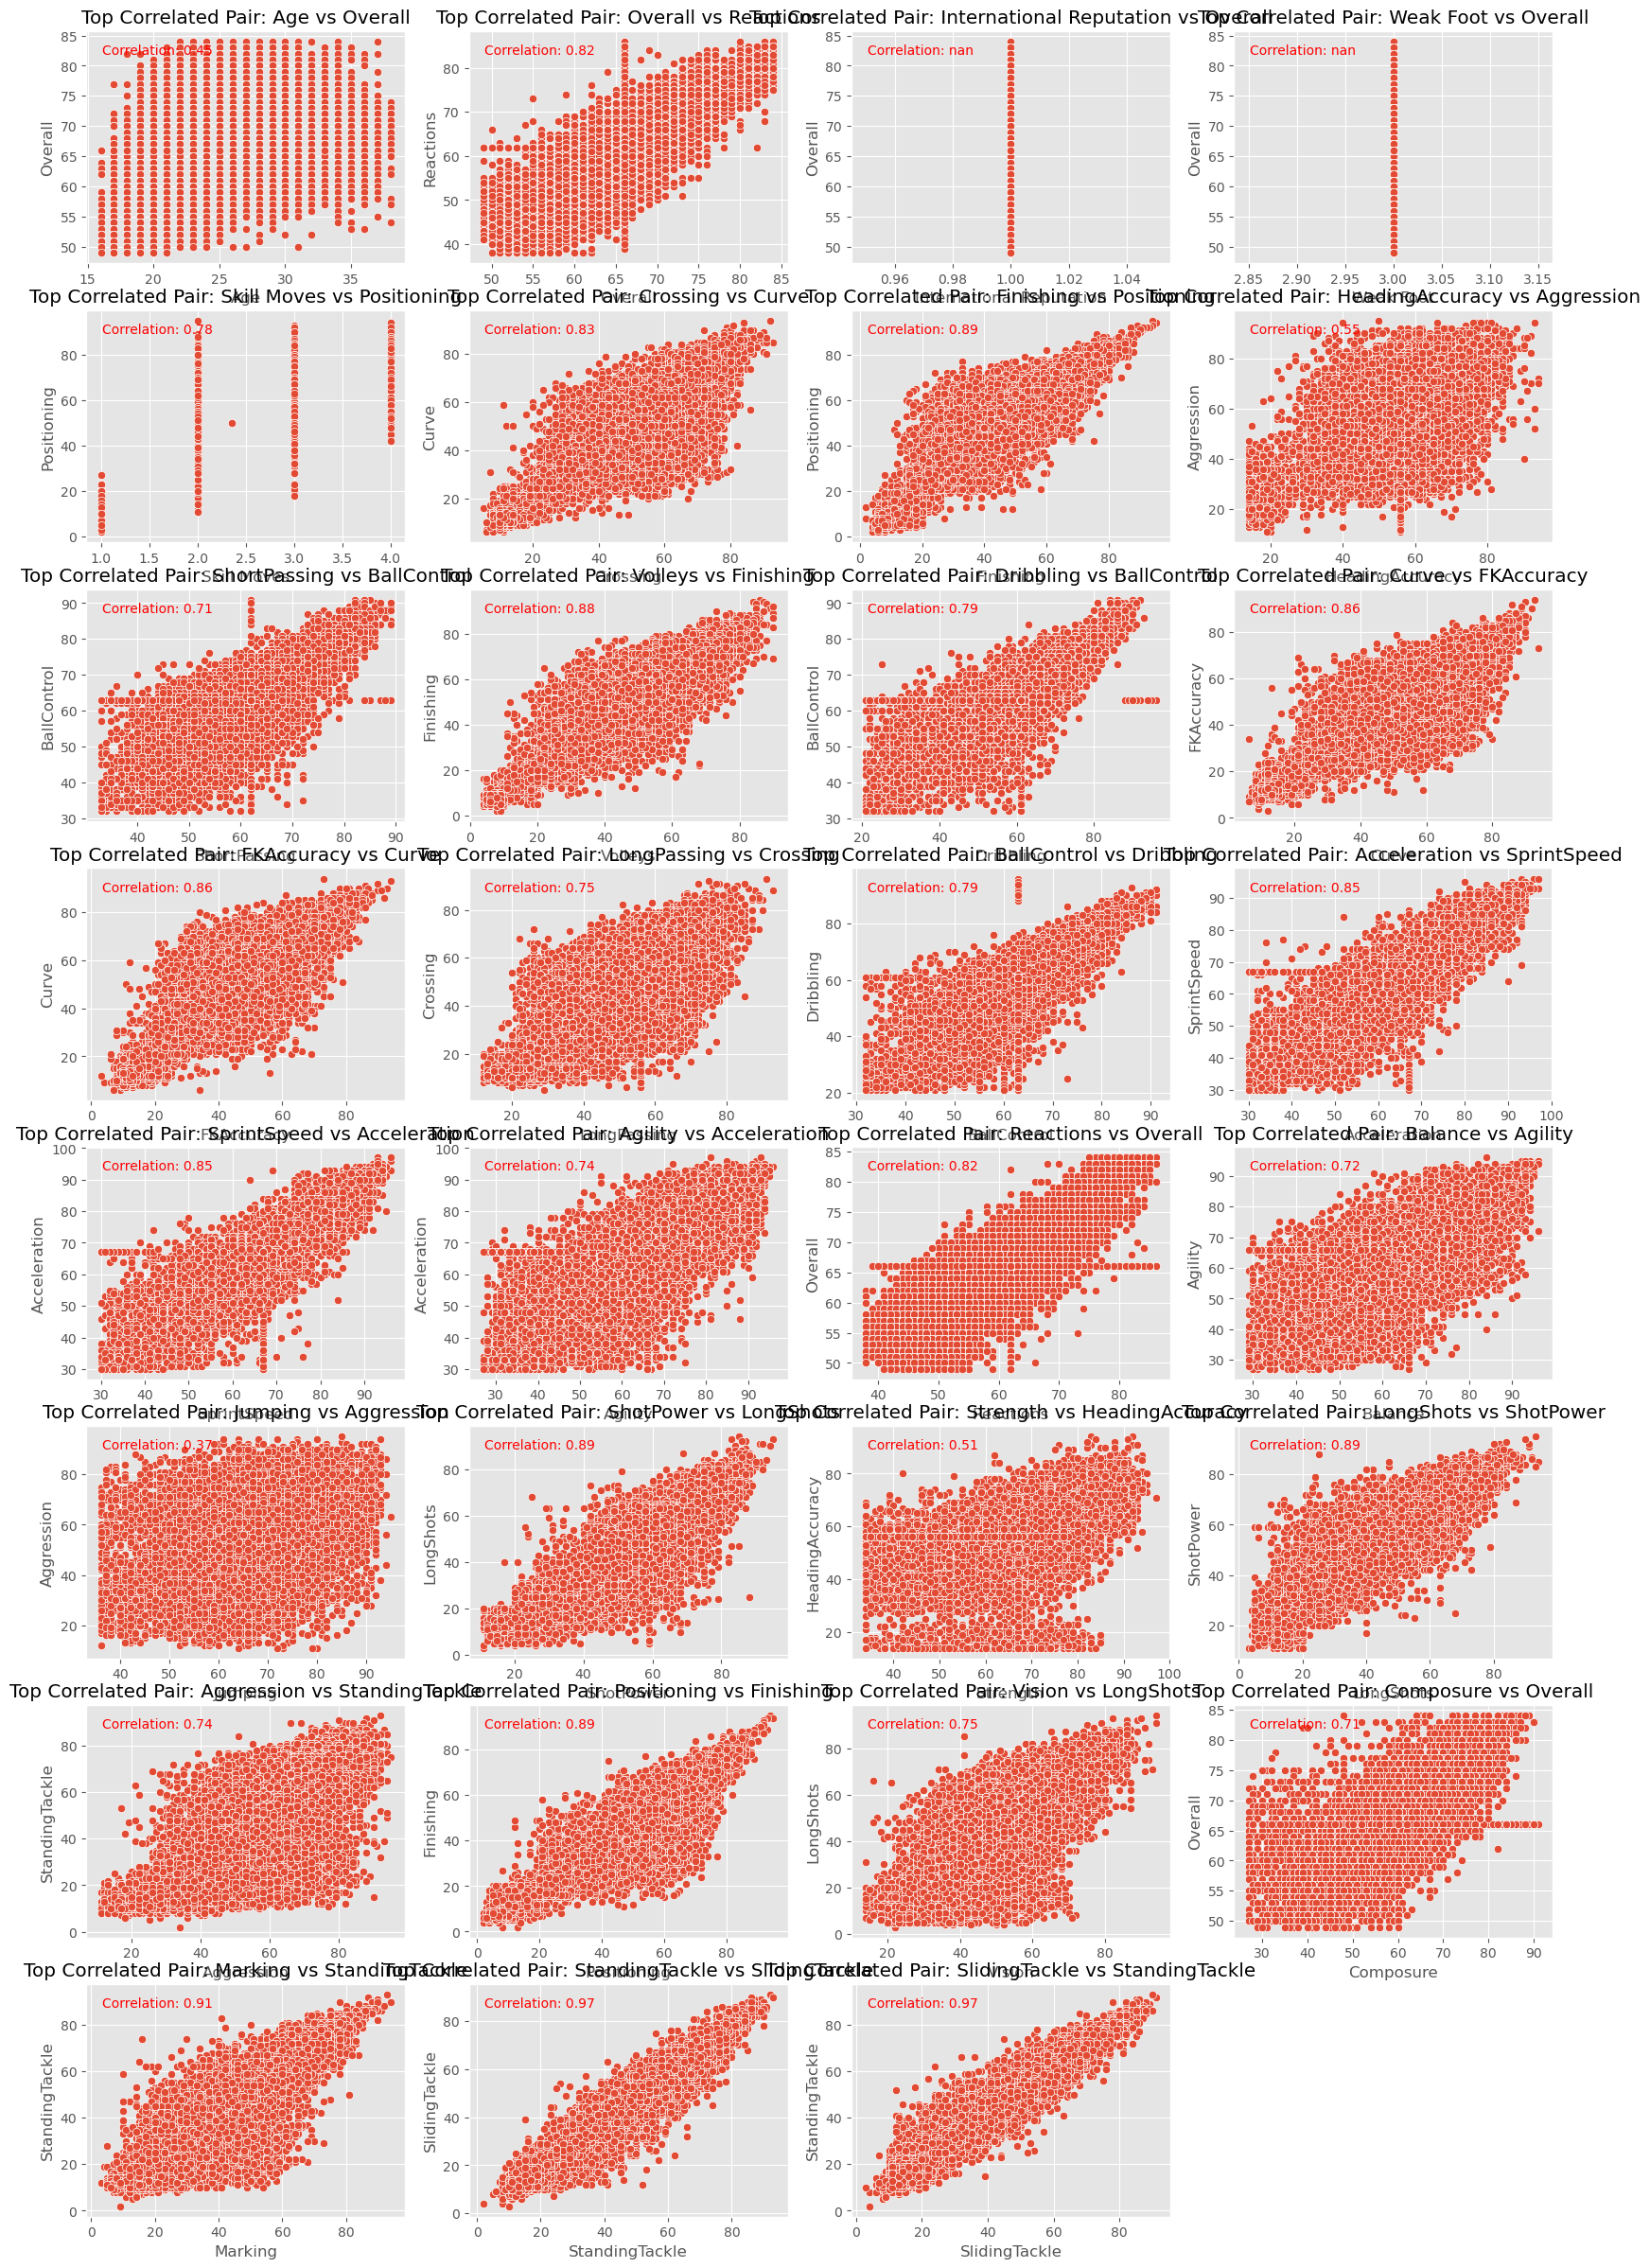

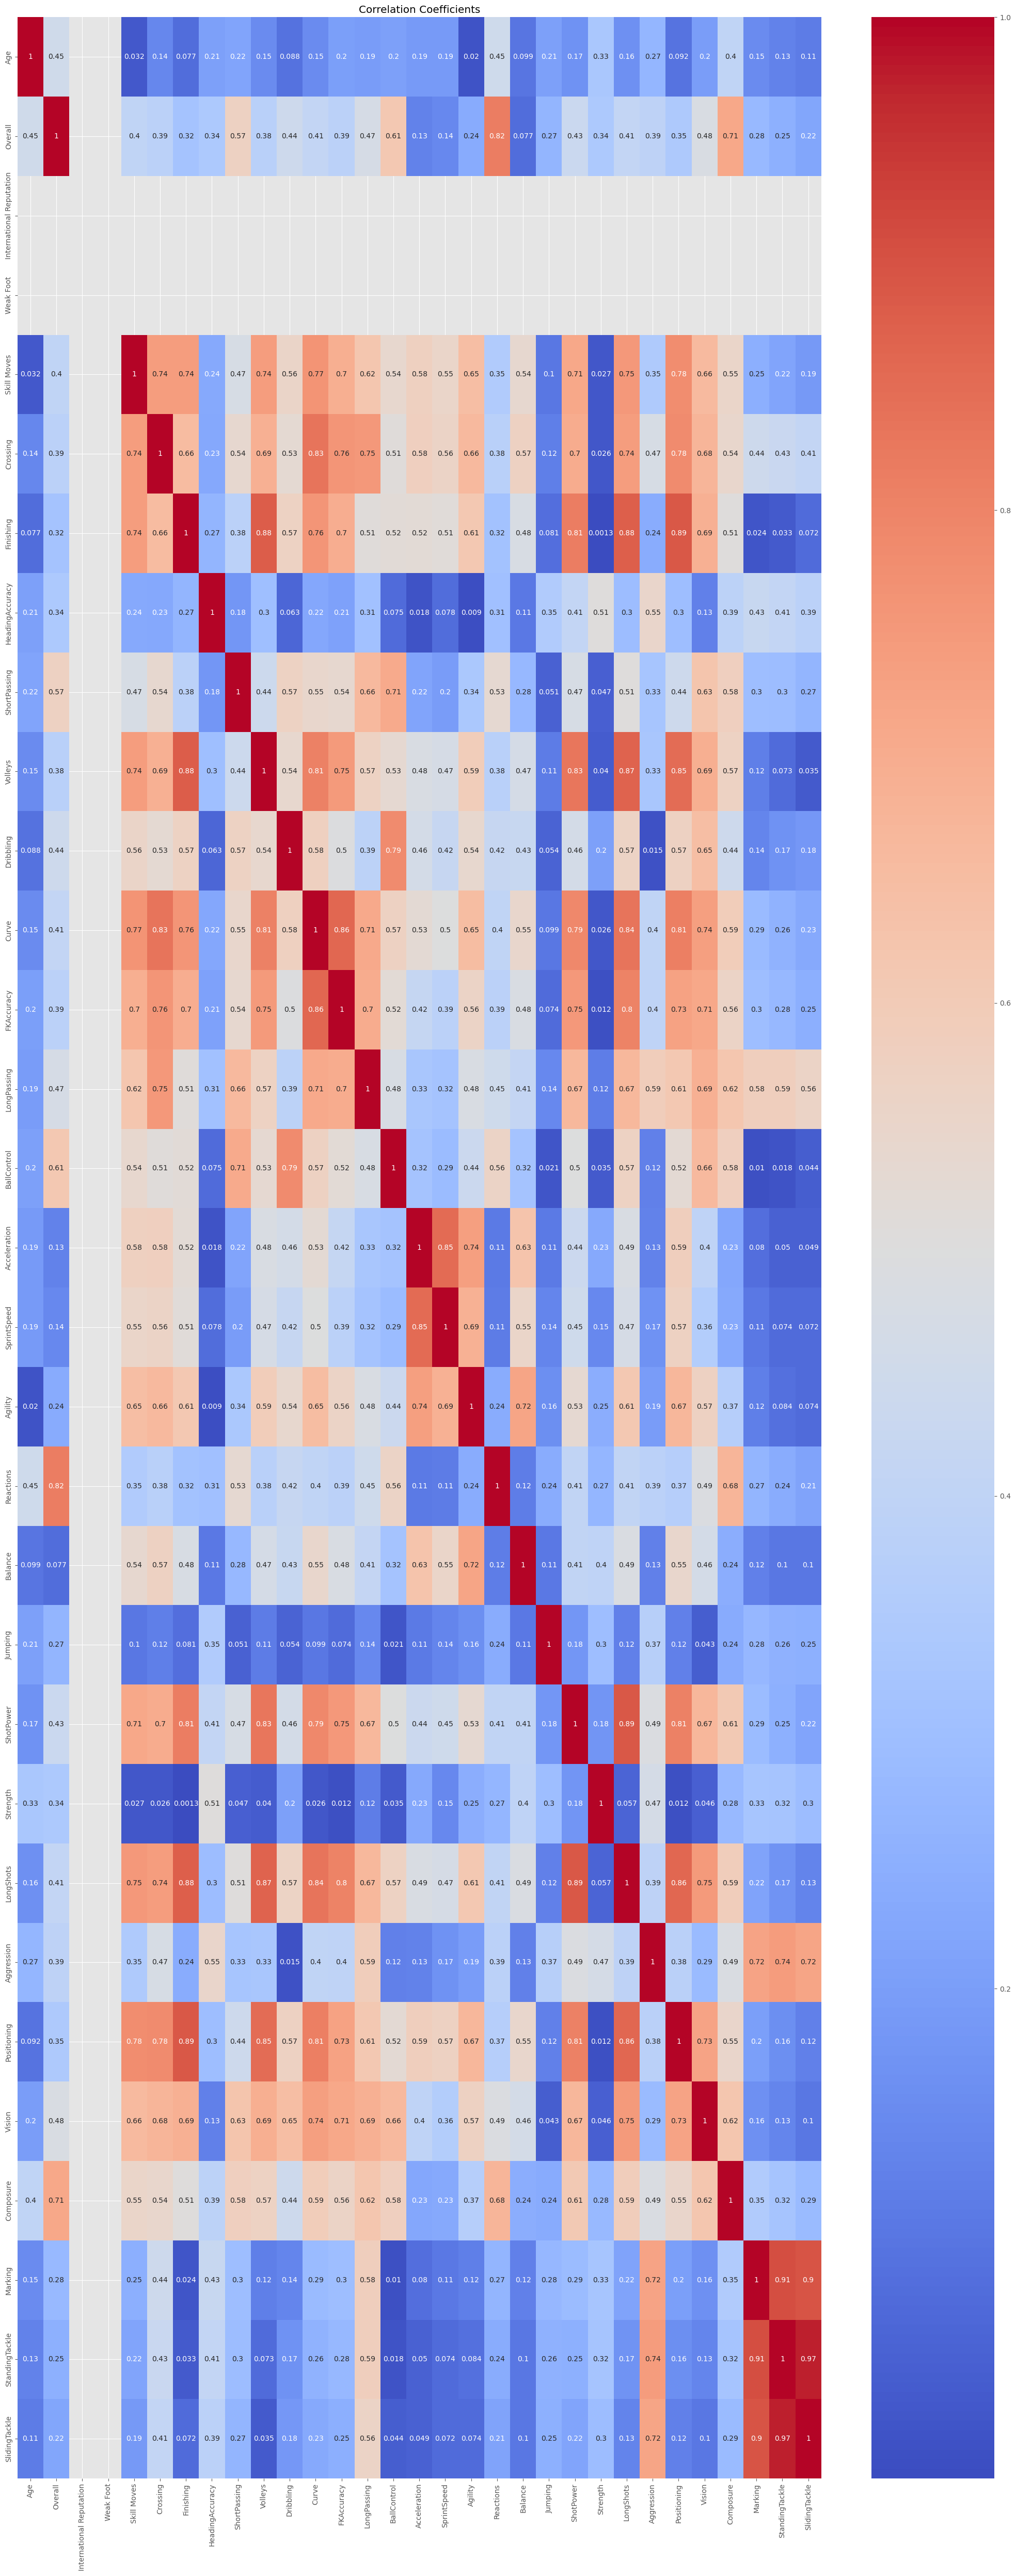

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical variables
numerical_vars = df1[['Age','Overall','International Reputation','Weak Foot','Skill Moves','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','Jumping','ShotPower','Strength','LongShots','Aggression','Positioning','Vision','Composure','Marking','StandingTackle','SlidingTackle']]

# Calculate the correlation coefficients
correlation_matrix = numerical_vars.corr().abs()

# Create a DataFrame to store top 10 correlated pairs for each variable
top_correlated_pairs = pd.DataFrame(index=numerical_vars.columns, columns=range(10))

# Iterate over each variable and find its top 10 correlated pairs
for column in numerical_vars.columns:
    top_correlated_pairs.loc[column] = correlation_matrix[column].sort_values(ascending=False).index[1:11]

# Visualize the top correlated pairs using subplots
fig, axes = plt.subplots(8, 4, figsize=(20, 30))

for i, ax in enumerate(axes.flatten()):
    if i < len(numerical_vars.columns):  # Ensure index is within bounds
        variable = numerical_vars.columns[i]
        correlated_variable = top_correlated_pairs.loc[variable, 0]  # Taking the first correlated variable for simplicity
        sns.scatterplot(x=variable, y=correlated_variable, data=numerical_vars, ax=ax)
        ax.set_title(f'Top Correlated Pair: {variable} vs {correlated_variable}')
        ax.set_xlabel(variable)
        ax.set_ylabel(correlated_variable)
        
        # Add correlation coefficient to the plot
        corr_coefficient = correlation_matrix.loc[variable, correlated_variable]
        ax.annotate(f'Correlation: {corr_coefficient:.2f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10, color='red')

    else:
        ax.axis('off')  # Turn off empty subplots
        
plt.figure(figsize=(20, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Coefficients')

# Adjust layout
plt.tight_layout()
plt.show()


In [46]:
df1.head()

Name Nationality                 Club    Value Preferred Foot  \
0           L. Messi   Argentina         FC Barcelona  €110.5M           Left   
1  Cristiano Ronaldo    Portugal             Juventus     €77M          Right   
2          Neymar Jr      Brazil  Paris Saint-Germain  €118.5M          Right   
3             De Gea       Spain    Manchester United     €72M          Right   
4       K. De Bruyne     Belgium      Manchester City    €102M          Right   

        Work Rate   Body Type Position        Joined Height  ... ShotPower  \
0  Medium/ Medium       Messi       RF   Jul 1, 2004    5'7  ...      85.0   
1       High/ Low  C. Ronaldo       ST  Jul 10, 2018    6'2  ...      95.0   
2    High/ Medium      Neymar       LW   Aug 3, 2017    5'9  ...      80.0   
3  Medium/ Medium        Lean       GK   Jul 1, 2011    6'4  ...      31.0   
4      High/ High      Normal      RCM  Aug 30, 2015   5'11  ...      91.0   

  Strength  LongShots  Aggression  Positioning  Vision  Composure  Marking  \
0     59.0       94.0        48.0         94.0    94.0       60.0     33.0   
1     79.0       93.0        63.0         95.0    82.0       60.0     28.0   
2     49.0       82.0        56.0         89.0    87.0       60.0     27.0   
3     64.0       12.0        38.0         12.0    68.0       68.0     15.0   
4     75.0       91.0        76.0         87.0    94.0       88.0     68.0   

   StandingTackle  SlidingTackle  
0            28.0           26.0  
1            31.0           23.0  
2            24.0           33.0  
3            21.0           13.0  
4            58.0           51.0  

[5 rows x 44 columns]

## Convert Categorical Columns to Numerical

- One Hot Encoding
- Label Encoder

In [47]:
cat_vars.columns.tolist()

['Name',
 'Nationality',
 'Club',
 'Value',
 'Preferred Foot',
 'Work Rate',
 'Body Type',
 'Position',
 'Joined',
 'Height',
 'Weight',
 'Release Clause']

In [48]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
columns_to_encode = ['Name','Nationality','Club','Value','Preferred Foot','Work Rate','Body Type','Position','Joined','Height','Weight','Release Clause']

# Create a label encoder instance
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in columns_to_encode:
    df1[column] = label_encoder.fit_transform(df1[column])

# Display the updated DataFrame
print(df1.head())


    Name  Nationality  Club  Value  Preferred Foot  Work Rate  Body Type  \
0   9632            6   212     16               0          8          4   
1   3153          123   326    195               1          1          1   
2  12508           20   435     18               1          2          5   
3   4136          139   375    190               1          8          3   
4   8617           13   374     12               1          0          6   

   Position  Joined  Height  ...  ShotPower  Strength  LongShots  Aggression  \
0        21     774       8  ...       85.0      59.0       94.0        48.0   
1        26     794      13  ...       95.0      79.0       93.0        63.0   
2        14     247      10  ...       80.0      49.0       82.0        56.0   
3         5     781      15  ...       31.0      64.0       12.0        38.0   
4        19     253       2  ...       91.0      75.0       91.0        76.0   

   Positioning  Vision  Composure  Marking  StandingTackle  Sl

## Model Selection for Predicting Player Ratings

- It is a regression task. In this task we will be using the following algorithmns
- Linear regression
- Decision tree regression
- Random forest regression
- Lasso Regression

## Feature Selections
- The target is what you want to predict. In this case, we want to predict house prices.
- The independent variables after dropping the target is our X, which is what we are going to train our model.

In [97]:
# the target is usually named as y
y = df1['Overall']
y.head()

0    66.0
1    66.0
2    66.0
3    66.0
4    66.0
Name: Overall, dtype: float64

In [100]:
# select the independent variables
X = df1.drop('Overall', axis = 1)
X.head()

Name  Nationality  Club  Value  Preferred Foot  Work Rate  Body Type  \
0   9632            6   212     16               0          8          4   
1   3153          123   326    195               1          1          1   
2  12508           20   435     18               1          2          5   
3   4136          139   375    190               1          8          3   
4   8617           13   374     12               1          0          6   

   Position  Joined  Height  ...  ShotPower  Strength  LongShots  Aggression  \
0        21     774       8  ...       85.0      59.0       94.0        48.0   
1        26     794      13  ...       95.0      79.0       93.0        63.0   
2        14     247      10  ...       80.0      49.0       82.0        56.0   
3         5     781      15  ...       31.0      64.0       12.0        38.0   
4        19     253       2  ...       91.0      75.0       91.0        76.0   

   Positioning  Vision  Composure  Marking  StandingTackle  SlidingTackle  
0         94.0    94.0       60.0     33.0            28.0           26.0  
1         95.0    82.0       60.0     28.0            31.0           23.0  
2         89.0    87.0       60.0     27.0            24.0           33.0  
3         12.0    68.0       68.0     15.0            21.0           13.0  
4         87.0    94.0       88.0     68.0            58.0           51.0  

[5 rows x 43 columns]

## Train-Test-Split

We will split the dataset into training and testing set. Typically, we will allocate a certain percentage of 70-30 for training and testing, respectively. This will be done using the train_test_split function from scikit-learn.

In [101]:
from sklearn.model_selection import train_test_split

# split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print('\n', X_train.head(2))
print('\n', X_test.head(2))
print('\n', y_train.head(2))
print('\n', y_test.head(2))


         Name  Nationality  Club  Value  Preferred Foot  Work Rate  Body Type  \
17955  11963           86   175    151               1          8          3   
14920   3294           46   164    151               1          6          6   

       Position  Joined  Height  ...  ShotPower  Strength  LongShots  \
17955         4     787      11  ...       47.0      43.0       30.0   
14920         4     787      10  ...       60.0      72.0       54.0   

       Aggression  Positioning  Vision  Composure  Marking  StandingTackle  \
17955        53.0         56.0    46.0       43.0     41.0            36.0   
14920        77.0         49.0    45.0       64.0     57.0            58.0   

       SlidingTackle  
17955           49.0  
14920           54.0  

[2 rows x 43 columns]

         Name  Nationality  Club  Value  Preferred Foot  Work Rate  Body Type  \
5848    7419           59     7      2               1          8          6   
14634  10538          132   329     77             

In [102]:
# check the shape of the splitted data
print(f'The X_train shape: {X_train.shape}')
print(f'The X_test shape: {X_test.shape}')
print(f'The y_train shape: {y_train.shape}')
print(f'The y_test shape: {y_test.shape}')

The X_train shape: (12744, 43)
The X_test shape: (5463, 43)
The y_train shape: (12744,)
The y_test shape: (5463,)


### Standardization
We will scale the features of the data using MinMax Scaler from scikit-learn.

In [103]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data
X_test_scaled = scaler.transform(X_test)

In [104]:
# import the necessary libraries for the model building
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# algorithms for the evaluation of model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Linear Regression

In [105]:
lr_model = LinearRegression()

# fit the the model
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [106]:
# create predictions
y_pred = lr_model.predict(X_test_scaled)

In [107]:
# manually compare the lagos house price
print('Actual Overall: ', y.head().tolist())
print('..........................................')
print('Predicted Overall: ', np.round(y_pred[:5].tolist(), 2))

Actual Overall:  [66.0, 66.0, 66.0, 66.0, 66.0]
..........................................
Predicted Overall:  [63.97 59.95 59.41 70.93 71.18]


In [108]:
# model evaluation
linear_mse = mean_squared_error(y_test, y_pred)
linear_r2 = r2_score(y_test, y_pred)
linear_mae = mean_absolute_error(y_test, y_pred)
linear_rmse = mean_squared_error(y_test, y_pred, squared = False)

print('R2 of Linear Regression:', linear_r2.round(2))
print('MAE of Linear Regression:', linear_mae.round(2))
print('MSE of Linear Regression:', linear_mse.round(2))
print('RMSE of Linear Regression:', linear_rmse.round(2))

R2 of Linear Regression: 0.76
MAE of Linear Regression: 2.33
MSE of Linear Regression: 10.13
RMSE of Linear Regression: 3.18


#### Decision Tree

In [109]:
dc_model = DecisionTreeRegressor()

# fit the the model
dc_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [110]:
# create predictions
y_pred = dc_model.predict(X_test_scaled)

In [111]:
# manually compare the Footballers
print('Actual Overall: ', y.head().tolist())
print('..........................................')
print('Predicted Overall: ', np.round(y_pred[:5].tolist(), 2))

Actual Overall:  [66.0, 66.0, 66.0, 66.0, 66.0]
..........................................
Predicted Overall:  [69. 60. 62. 69. 74.]


In [112]:
# model evaluation
dc_mse = mean_squared_error(y_test, y_pred)
dc_r2 = r2_score(y_test, y_pred)
dc_mae = mean_absolute_error(y_test, y_pred)
dc_rmse = mean_squared_error(y_test, y_pred, squared = False)

print('R2 of Decision Tree Regressor:', dc_r2.round(2))
print('MAE of Decision Tree Regressor:', dc_mae.round(2))
print('MSE of Decision Tree Regressor:', dc_mse.round(2))
print('RMSE of Decision Tree Regressor:', dc_rmse.round(2))

R2 of Decision Tree Regressor: 0.82
MAE of Decision Tree Regressor: 1.46
MSE of Decision Tree Regressor: 7.57
RMSE of Decision Tree Regressor: 2.75


#### Random Forest Regressor

In [113]:
rf_model = RandomForestRegressor()

# fit the the model
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [114]:
# create predictions
y_pred = rf_model.predict(X_test_scaled)

In [115]:
# manually compare the lagos house price
print('Actual Overall: ', y.head().tolist())
print('..........................................')
print('Predicted Overall: ', np.round(y_pred[:5].tolist(), 2))

Actual Overall:  [66.0, 66.0, 66.0, 66.0, 66.0]
..........................................
Predicted Overall:  [67.53 60.66 63.05 69.38 73.61]


In [116]:
# model evaluation
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_rmse = mean_squared_error(y_test, y_pred, squared = False)

print('R2 of Random Forest Regressor:', rf_r2.round(2))
print('MAE of Random Forest Regressor:', rf_mae.round(2))
print('MSE of Random Forest Regressor:', rf_mse.round(2))
print('RMSE of Random Forest Regressor:', rf_rmse.round(2))

R2 of Random Forest Regressor: 0.92
MAE of Random Forest Regressor: 1.01
MSE of Random Forest Regressor: 3.21
RMSE of Random Forest Regressor: 1.79


### Lasso Regression

In [117]:
lasso_model =  Lasso(alpha = 0.5)

# fit the the model
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.5)

In [118]:
# create predictions
y_pred = lasso_model.predict(X_test_scaled)

In [119]:
# manually compare the lagos house price
print('Actual Overall: ', y.head().tolist())
print('..........................................')
print('Predicted Overall: ', np.round(y_pred[:5].tolist(), 2))

Actual Overall:  [66.0, 66.0, 66.0, 66.0, 66.0]
..........................................
Predicted Overall:  [67.32 63.4  63.32 67.47 68.38]


In [120]:
# model evaluation
lasso_mse = mean_squared_error(y_test, y_pred)
lasso_r2 = r2_score(y_test, y_pred)
lasso_mae = mean_absolute_error(y_test, y_pred)
lasso_rmse = mean_squared_error(y_test, y_pred, squared = False)

print('R2 of Lasso Regressor:', lasso_r2.round(2))
print('MAE of Lasso Regressor:', lasso_mae.round(2))
print('MSE of Lasso Regressor:', lasso_mse.round(2))
print('RMSE of Lasso Regressor:', lasso_rmse.round(2))

R2 of Lasso Regressor: 0.5
MAE of Lasso Regressor: 3.62
MSE of Lasso Regressor: 21.29
RMSE of Lasso Regressor: 4.61


## Model Conclusion

Random Forest Regressor has shown a good performance among the other models based on the evaluation metrics, a R2_score of 0.92 compared to others means that it is a good fit of the model on the data. It means that the model is able to explain 79% of the target variable(y) by the independent variables.

## Feature Importance and Engineering
After training the best performing model which is Random Forest, we will analyze feature importance. We want to see which features of the independent variables contribute to the performance of the Random Forest model, and use it to retrain and vaidate our model.

In [121]:
# Feature importances using Random Forest
feature_importances = rf_model.feature_importances_

# Display feature importances alongside feature names
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key = lambda x: x[1], reverse = True)

for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance}')

Reactions: 0.6397928010871394
BallControl: 0.06873206482955399
Value: 0.06738599633682582
StandingTackle: 0.05073502199620729
Age: 0.02824574836171112
Composure: 0.0207168945659807
Release Clause: 0.017566950698239242
ID: 0.013772249699533614
Dribbling: 0.00895335811371023
Marking: 0.008252986259645134
HeadingAccuracy: 0.007709572625713447
Positioning: 0.006285601891942409
Finishing: 0.005088822825992652
SlidingTackle: 0.004417467401359301
Crossing: 0.0036465754541992663
ShortPassing: 0.0033951088835296288
ShotPower: 0.0033515203923472616
Aggression: 0.002987593833931134
Strength: 0.0028351101349052077
LongShots: 0.002682188750077951
LongPassing: 0.0024650086959863812
Jumping: 0.0023348870203188476
SprintSpeed: 0.002301240162088561
FKAccuracy: 0.0022865562938484273
Agility: 0.0022534547821992934
Vision: 0.0022292949356549677
Name: 0.0021337494778333717
Volleys: 0.002039740328452184
Club: 0.0019163744525236613
Weight: 0.0018770207116583484
Acceleration: 0.0017673757201234022
Balance: 0.

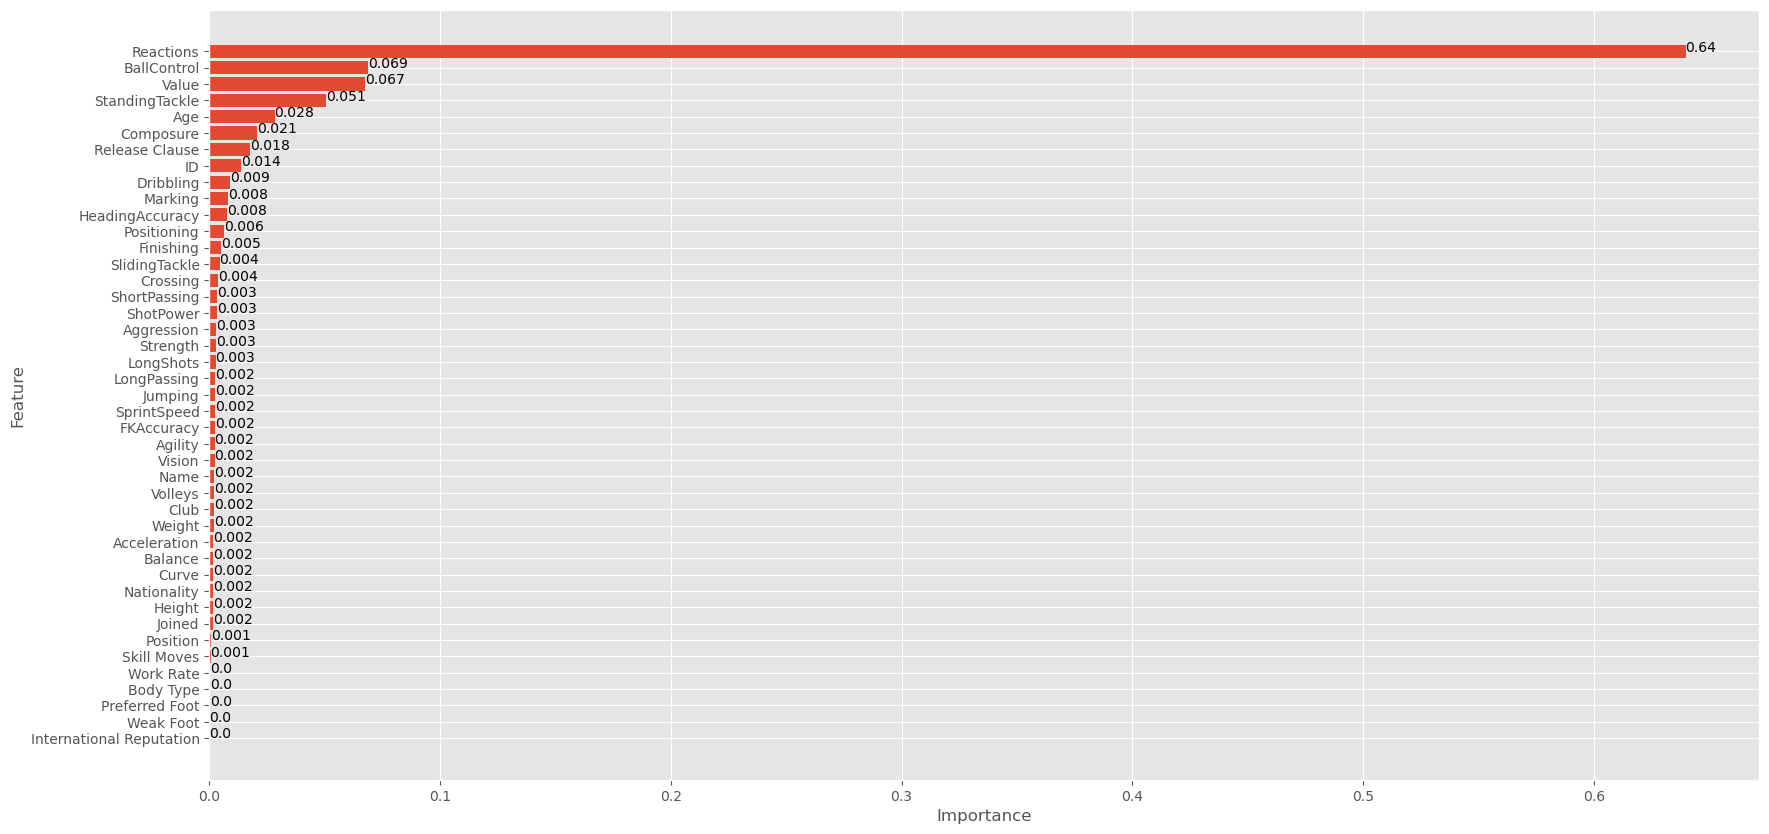

In [125]:
# Plot the feature importance using Random Forest
feature_importances = rf_model.feature_importances_

# Display feature importances alongside feature names
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key = lambda x: x[1], reverse = False)

# Create a horizontal bar chart to display feature importances
plt.figure(figsize = (20, 10))
plt.barh(range(len(sorted_feature_importance)), [val[1] for val in sorted_feature_importance], align='center')
plt.yticks(range(len(sorted_feature_importance)), [val[0] for val in sorted_feature_importance])
plt.xlabel('Importance')
plt.ylabel('Feature')

# Add data labels to the chart
for i, v in enumerate([val[1] for val in sorted_feature_importance]):
    plt.text(v, i, str(round(v, 3)))

plt.show()

In [124]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

In [126]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature selection using SelectKBest with f_regression score function
selector = SelectKBest(score_func=f_regression, k=7)  # Select top 7 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

## Model Training

We will fit our best performing random forest model on the selected features and make predictions on the validation set

In [127]:
# Train a linear regression model on the selected features
model = RandomForestRegressor()
model.fit(X_train_selected, y_train)

# create predictions
y_pred = model.predict(X_test_selected)

In [128]:
# manually compare the lagos house price
print('Actual Overall: ', y.head().tolist())
print('..........................................')
print('Predicted Overall: ', np.round(y_pred[:5].tolist(), 2))

Actual Overall:  [66.0, 66.0, 66.0, 66.0, 66.0]
..........................................
Predicted Overall:  [64.75 60.39 60.31 69.34 72.71]


In [129]:
# Create a dictionary of scoring metrics
scoring = {
    'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
    'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
    'r2': make_scorer(r2_score)
}

# Use cross_validate to evaluate the model with multiple metrics
cv_results = cross_validate(model, X_train_selected, y_train, cv=10, scoring=scoring)

# Extract the results for each metric
mse_scores = cv_results['test_neg_mean_squared_error']
mae_scores = cv_results['test_neg_mean_absolute_error']
r2_scores = cv_results['test_r2']

# Calculate the mean score for each metric
mse_mean = -mse_scores.mean()  # Convert negative MSE to positive
mae_mean = -mae_scores.mean()  # Convert negative MAE to positive
r2_mean = r2_scores.mean()

print(f"Mean Squared Error: {mse_mean}")
print(f"Mean Absolute Error: {mae_mean}")
print(f"R-squared: {r2_mean}")

Mean Squared Error: 8.383548993208233
Mean Absolute Error: 2.167170586105727
R-squared: 0.8115443854176411
